# **第二章: 基础Python数据处理**

***

根据在EEG数据处理过程中可能需要用到的一些基本数据处理技能，这一章旨在提供一个使用Python进行数组操作与统计分析的基本教程，其分为以下三个部分：

- **第一节: 基础NumPy数组操作**
- **第二节: 基础数据读取与存储操作**  
- **第三节: 基础统计分析**  

## 下载与导入Python包

In [1]:
!pip install h5py
!pip install neurora

import numpy as np
import h5py
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, f_oneway
from mne.stats import fdr_correction, f_mway_rm
from neurora.stuff import clusterbased_permutation_1d_1samp_1sided, permutation_test

plt.rcParams["figure.dpi"] = 300

# 第一节 - 基础NumPy数组操作

用Python进行数据处理时，NumPy矩阵往往是最可能用来进行分析操作的数据类型  
在第一部分，我们介绍了可能在之后数据分析过程中会涉及到的一些基础而重要的NumPy矩阵操作及其实现

### 生成数组

In [2]:
# 生成shape为[3, 4]的全为0的矩阵
A = np.zeros([3, 4])
print(A.shape)
print(A)

(3, 4)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [3]:
# 生成shape为[3, 4]的全为1的矩阵
A = np.ones([3, 4])
print(A.shape)
print(A)

(3, 4)
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [4]:
# 生成shape为[3, 4]的随机矩阵（随机值在0-1之间）
A = np.random.rand(3, 4)
print(A.shape)
print(A)

(3, 4)
[[0.05112774 0.60751207 0.90002625 0.96905644]
 [0.9171633  0.45492359 0.38654862 0.59262132]
 [0.32171362 0.81383294 0.79545584 0.38497855]]


In [5]:
# 生成shape为[3, 4]的随机矩阵（随机值在20-80之间）
A = np.random.uniform(low=20, high=80, size=[3, 4])
print(A.shape)
print(A)

(3, 4)
[[20.11532485 49.40626047 31.85245076 20.09421271]
 [76.32473914 32.87250266 55.67578445 29.30499036]
 [69.96561644 21.00182932 74.92944439 24.95718795]]


### 矩阵铺平为向量

In [6]:
A = np.ravel(A)
print(A.shape)
print(A)

(12,)
[20.11532485 49.40626047 31.85245076 20.09421271 76.32473914 32.87250266
 55.67578445 29.30499036 69.96561644 21.00182932 74.92944439 24.95718795]


### 修改数组尺寸

In [7]:
# 将A的shape修改为[3, 4]
A = np.reshape(A, (3, 4))
print(A.shape)
print(A)

(3, 4)
[[20.11532485 49.40626047 31.85245076 20.09421271]
 [76.32473914 32.87250266 55.67578445 29.30499036]
 [69.96561644 21.00182932 74.92944439 24.95718795]]


### 数组转置

#### 转置二维矩阵

In [8]:
A = A.T
print(A.shape)
print(A)

(4, 3)
[[20.11532485 76.32473914 69.96561644]
 [49.40626047 32.87250266 21.00182932]
 [31.85245076 55.67578445 74.92944439]
 [20.09421271 29.30499036 24.95718795]]


#### 转置多维矩阵

In [9]:
# 首先，生成一个shape为[2, 3, 4]的三维数组
B = np.random.rand(2, 3, 4)
print(B.shape)
print(B)

(2, 3, 4)
[[[0.1251679  0.4465006  0.98517376 0.24987184]
  [0.93341562 0.95712426 0.57932509 0.12847699]
  [0.54709778 0.32424561 0.88498897 0.93968963]]

 [[0.48180172 0.51971636 0.65697794 0.23035205]
  [0.12833121 0.63883396 0.72588296 0.66972474]
  [0.87228733 0.66362678 0.04164158 0.20564054]]]


In [10]:
# 将A转置为shape为[2, 4, 3]的数组
B = np.transpose(B, (0, 2, 1))
print(B.shape)
print(B)

(2, 4, 3)
[[[0.1251679  0.93341562 0.54709778]
  [0.4465006  0.95712426 0.32424561]
  [0.98517376 0.57932509 0.88498897]
  [0.24987184 0.12847699 0.93968963]]

 [[0.48180172 0.12833121 0.87228733]
  [0.51971636 0.63883396 0.66362678]
  [0.65697794 0.72588296 0.04164158]
  [0.23035205 0.66972474 0.20564054]]]


In [11]:
# 这里是另外一个例子:
# 将shape为[2, 4, 3]的数组转置成shape为[4, 3, 2]的数组
B = np.transpose(B, (1, 2, 0))
print(B.shape)
print(B)

(4, 3, 2)
[[[0.1251679  0.48180172]
  [0.93341562 0.12833121]
  [0.54709778 0.87228733]]

 [[0.4465006  0.51971636]
  [0.95712426 0.63883396]
  [0.32424561 0.66362678]]

 [[0.98517376 0.65697794]
  [0.57932509 0.72588296]
  [0.88498897 0.04164158]]

 [[0.24987184 0.23035205]
  [0.12847699 0.66972474]
  [0.93968963 0.20564054]]]


### 数组合并

In [12]:
# 首先，生成一个shape为[4, 3, 3]的数组
C = np.random.rand(4, 3, 3)
print(C.shape)
print(C)

(4, 3, 3)
[[[0.3210624  0.23536965 0.82331177]
  [0.8302677  0.69467763 0.76894004]
  [0.08012573 0.71893155 0.09149958]]

 [[0.23118897 0.63378861 0.88927868]
  [0.81971258 0.22756396 0.61695579]
  [0.56462898 0.55817834 0.15021247]]

 [[0.50862727 0.59797703 0.32004772]
  [0.71856905 0.27744257 0.53626783]
  [0.04052776 0.05109676 0.74461469]]

 [[0.22888421 0.17161999 0.11380802]
  [0.02597403 0.50251612 0.02125208]
  [0.56715084 0.58848052 0.65643347]]]


In [13]:
# 将数组B（shape为[4, 3, 2]）与数组C（shape为[4, 3, 3]）合并
# 即对第三个维度进行合并，合并后数组shape为[4, 3, 5]
D = np.concatenate((B, C), axis=2)
print(D.shape)
print(D)

(4, 3, 5)
[[[0.1251679  0.48180172 0.3210624  0.23536965 0.82331177]
  [0.93341562 0.12833121 0.8302677  0.69467763 0.76894004]
  [0.54709778 0.87228733 0.08012573 0.71893155 0.09149958]]

 [[0.4465006  0.51971636 0.23118897 0.63378861 0.88927868]
  [0.95712426 0.63883396 0.81971258 0.22756396 0.61695579]
  [0.32424561 0.66362678 0.56462898 0.55817834 0.15021247]]

 [[0.98517376 0.65697794 0.50862727 0.59797703 0.32004772]
  [0.57932509 0.72588296 0.71856905 0.27744257 0.53626783]
  [0.88498897 0.04164158 0.04052776 0.05109676 0.74461469]]

 [[0.24987184 0.23035205 0.22888421 0.17161999 0.11380802]
  [0.12847699 0.66972474 0.02597403 0.50251612 0.02125208]
  [0.93968963 0.20564054 0.56715084 0.58848052 0.65643347]]]


In [14]:
# 这里是另外一个例子:
# 生成一个shape为[1, 3, 2]的数组E
# 合并数组B和数组E，得到shape为[5, 3, 2]的数组F
E = np.random.rand(1, 3, 2)
F = np.concatenate((B, E), axis=0)
print(F.shape)
print(F)

(5, 3, 2)
[[[1.25167898e-01 4.81801718e-01]
  [9.33415616e-01 1.28331205e-01]
  [5.47097783e-01 8.72287334e-01]]

 [[4.46500601e-01 5.19716360e-01]
  [9.57124262e-01 6.38833958e-01]
  [3.24245613e-01 6.63626781e-01]]

 [[9.85173757e-01 6.56977938e-01]
  [5.79325093e-01 7.25882960e-01]
  [8.84988965e-01 4.16415822e-02]]

 [[2.49871836e-01 2.30352054e-01]
  [1.28476991e-01 6.69724738e-01]
  [9.39689630e-01 2.05640537e-01]]

 [[7.60498301e-01 6.61822506e-01]
  [5.57488527e-01 3.50831202e-04]
  [2.02659146e-01 8.16902777e-01]]]


### 平均数组中的值

In [15]:
# 对数组B（shape为[4, 3, 2]）的第二个维度的值进行平均
B_mean = np.average(B, axis=1)
print(B_mean.shape)
print(B_mean)

(4, 2)
[[0.5352271  0.49414009]
 [0.57595683 0.60739237]
 [0.81649594 0.47483416]
 [0.43934615 0.36857244]]


### 将非NumPy对象转换成NumPy数组

In [16]:
G = [[1, 2], [3, 4]]
G_narry = np.array(G)
print(type(G))
print(type(G_narry))

<class 'list'>
<class 'numpy.ndarray'>


# 第二节 - 基础数据读取与存储操作

这部分，会介绍一些基本的基于Python用于数据（数组）读取与存储操作

### 基于MNE读取数据

参考“第一章：单被试数据预处理”中的”第一步 - 数据读取”和“第八步 - 数据提取”部分

### 使用h5py存储与读取数据

h5py库可以将数据存储为一种压缩性能很强的HDF5格式文件  
HDF5文件与MATLAB中的mat文件类似  
都是通过Key和dataset构成  
Key可以理解成数据的名称，dataset可以理解具体的数据  
但是HDF5具有比mat更强的压缩性能  
HDF5文件的后缀为.h5

#### 使用h5py存储数据

In [17]:
# 生成一个数据，其shape为[4, 5]
testdata = np.random.rand(4, 5)
# 调用h5py，将数据存为一个名为'test_data.h5'文件
f = h5py.File('test_data.h5', 'w')
# 使用Key+dataset的方式存储上述testdata矩阵，这里Key命名为'data'
f.create_dataset('data', data=testdata)
# 关闭调用
f.close()

#### 使用h5py读取数据

In [18]:
# 读取数据
testdata = np.array(h5py.File('test_data.h5', 'r')['data'])
# 打印数据信息
print(testdata.shape)
print(testdata)

(4, 5)
[[0.75905124 0.40456945 0.0647629  0.34018421 0.79352967]
 [0.44355118 0.84118372 0.64442303 0.2888924  0.69498299]
 [0.83323868 0.99960303 0.69763478 0.69363995 0.45934413]
 [0.11837144 0.57706793 0.33342381 0.41612961 0.00152108]]


### 使用NumPy存储与读取数据

NumPy自带的savetxt()可以将二维矩阵存为.txt文件  
其自带的loadtxt()则可以读取.txt文件中的数据

#### 使用NumPy存储数据

In [19]:
# 将NumPy Array格式的testdata存成一个名为'test_data.npy'的文件
np.save('test_data.npy', testdata)

#### 使用NumPy读取.npy文件

In [20]:
# 读取'test_data.npy'
testdata = np.load('test_data.npy')
# 打印数据信息
print(testdata.shape)
print(testdata)

(4, 5)
[[0.75905124 0.40456945 0.0647629  0.34018421 0.79352967]
 [0.44355118 0.84118372 0.64442303 0.2888924  0.69498299]
 [0.83323868 0.99960303 0.69763478 0.69363995 0.45934413]
 [0.11837144 0.57706793 0.33342381 0.41612961 0.00152108]]


### 使用NumPy存储二维数组为.txt文件与读取

NumPy自带的savetxt()可以将二维矩阵存为.txt文件  
其自带的loadtxt()则可以读取.txt文件中的数据

#### 使用NumPy存储二维数组形式的数据

In [21]:
# 将NumPy Array格式的testdata存成一个名为'test_data.txt'的文件
np.savetxt('test_data.txt', testdata)

#### 使用NumPy读取.txt文件存储的二维数组数据

In [22]:
# 读取'test_data.txt'
testdata = np.loadtxt('test_data.txt')
# 打印数据信息
print(testdata.shape)
print(testdata)

(4, 5)
[[0.75905124 0.40456945 0.0647629  0.34018421 0.79352967]
 [0.44355118 0.84118372 0.64442303 0.2888924  0.69498299]
 [0.83323868 0.99960303 0.69763478 0.69363995 0.45934413]
 [0.11837144 0.57706793 0.33342381 0.41612961 0.00152108]]


由于上述基于NumPy的方法仅适用于二维数据  
若实在想存储多维数据，可以先reshape为二维数据再进行存储  
以下代码为一个示例：

In [23]:
# 生成一个shape为[2, 3, 4]的三维数组
testdata_3d = np.random.rand(2, 3, 4)
# reshape成[2, 12]
testdata_3d_to_2d = np.reshape(testdata_3d, (2, 12))
# 存为.txt文件
np.savetxt('test_data_3d_to_2d.txt', testdata_3d_to_2d)
# 读取数据
testdata_2d = np.loadtxt('test_data_3d_to_2d.txt')
# reshape成[2, 3, 4]
testdata_2d_to_3d = np.reshape(testdata_2d, (2, 3, 4))

### 将.mat文件读取为NumPy数组

Python中读取MATLAB下的.mat格式文件，主要通过以下两种方式：

#### 使用scipy.io读取

以下代码仅为示例，无实际数据  
filename为待读入.mat文件的地址，Key为待读入数据的Key

> import scipy.io as sio  
> data = np.array(sio.loadmat(filename)[Key])

#### Reading with h5py

h5py也可以用来读取.mat文件，与读取.h5文件的步骤相同  
上述已经介绍过，以下代码仅为示例，无实际数据  
这一方法不支持MATLAB版本低于7.3的.mat文件

> data = np.array(h5py.File(filename, 'r')[Key])

### 将NumPy数组存为.mat文件

反向地，如果你希望将预处理后的NumPy数组格式的EEG数据存成.mat格式以方便实用MATLAB进行后续分析

**使用scipy.io存储**

以下代码仅为示例，无实际数据  
filename为存储.mat文件的地址，Key为存储数据的Key

> sio.savemat(filename, {Key: data})

# 第三节 - 基础统计分析

在这一节中，我们会介绍一系列需要在进行EEG数据多被试组分析时使用的基础统计操作

## 描述性统计

首先，我们介绍以下几个常用描述统计指标的计算方法:

- 均值(mean)
- 方差(variance)
- 标准差(standard deviation)
- 标准误差(standard error)

这里，生成一些虚假的脑电数据进行后续统计分析示例  
假设随机生成如下的100个被试的从-200ms到1000ms（1200个时间点，每个点对应1ms）的事件相关电位（ERP）数据

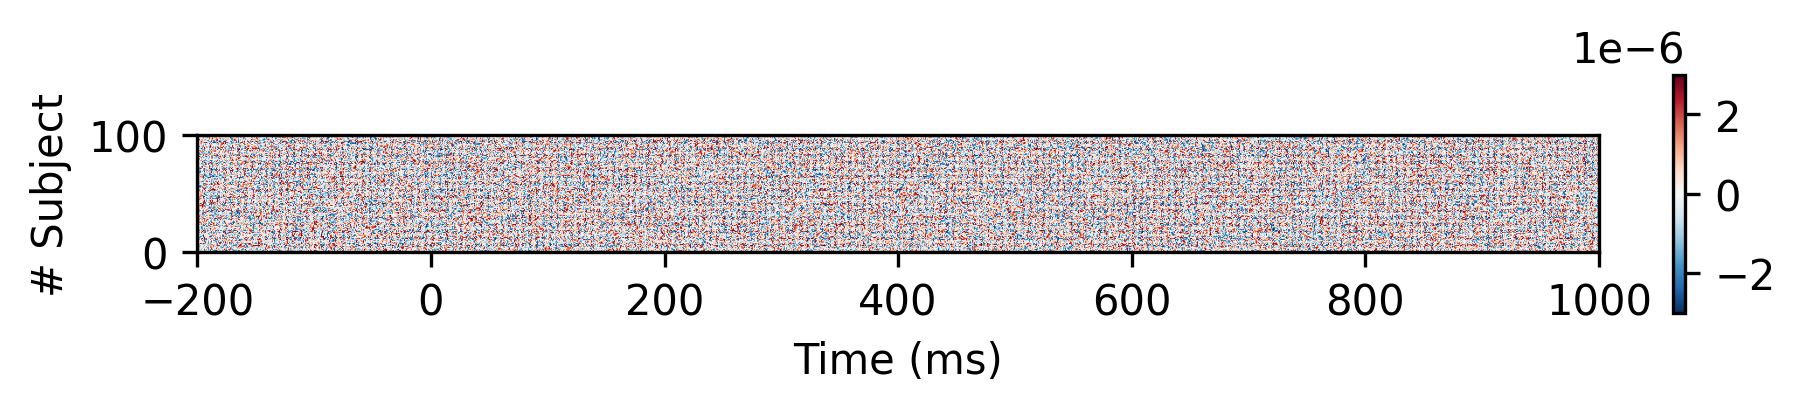

In [24]:
# 生成虚假脑电数据，其shape为[100, 1200]
data = np.random.uniform(low=-3e-6, high=3e-6, size=(100, 1200))
# 逐trial可视化
plt.imshow(data, extent=[-200, 1000, 0, 100], cmap='RdBu_r')
plt.colorbar(fraction=0.008, ticks=[-2e-6, 0, 2e-6])
plt.xlabel('Time (ms)')
plt.ylabel('# Subject')
plt.show()

#### 计算100个被试的ERP均值

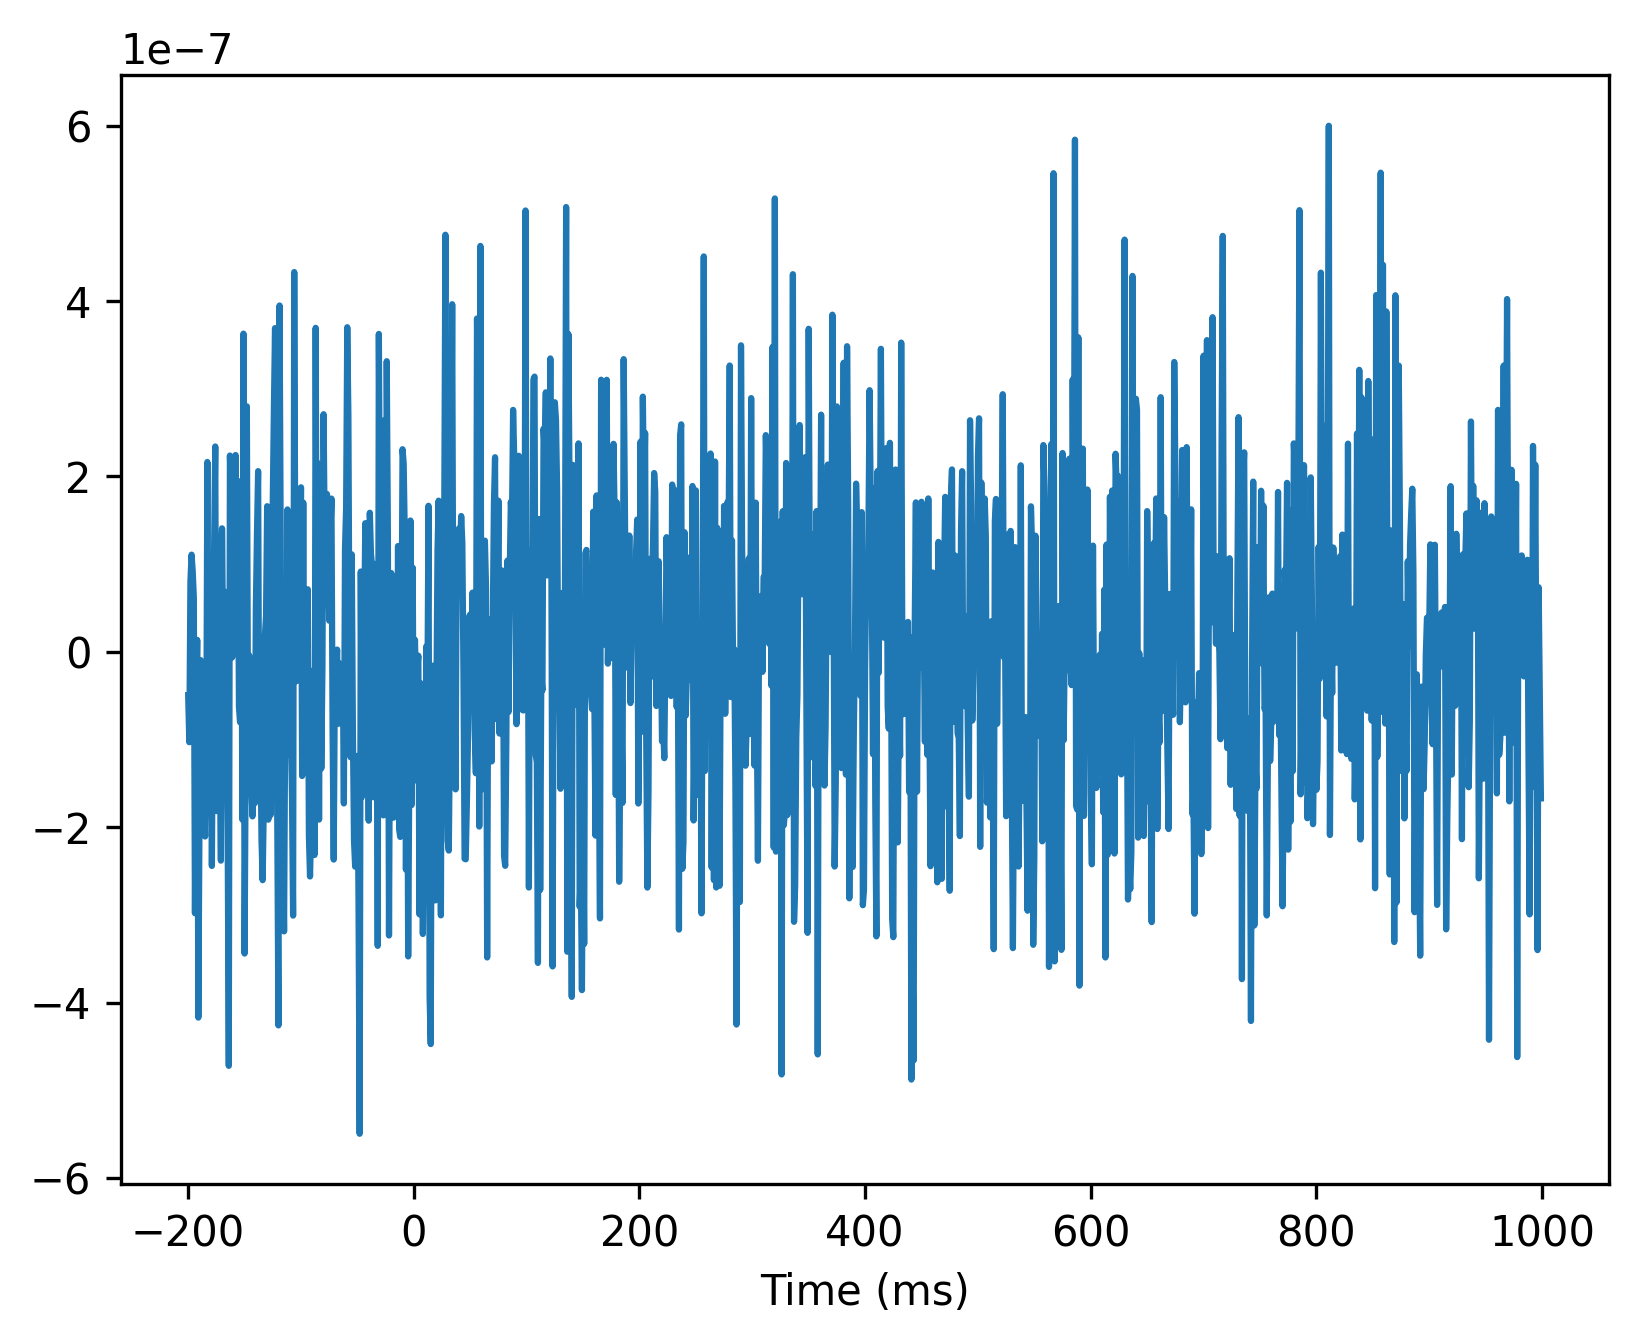

In [25]:
# 对100个被试平均
data_mean = np.mean(data, axis=0)
times = np.arange(-200, 1000)
# 对均值可视化
plt.plot(times, data_mean)
plt.xlabel('Time (ms)')
plt.show()

#### 计算100个被试的ERP的方差

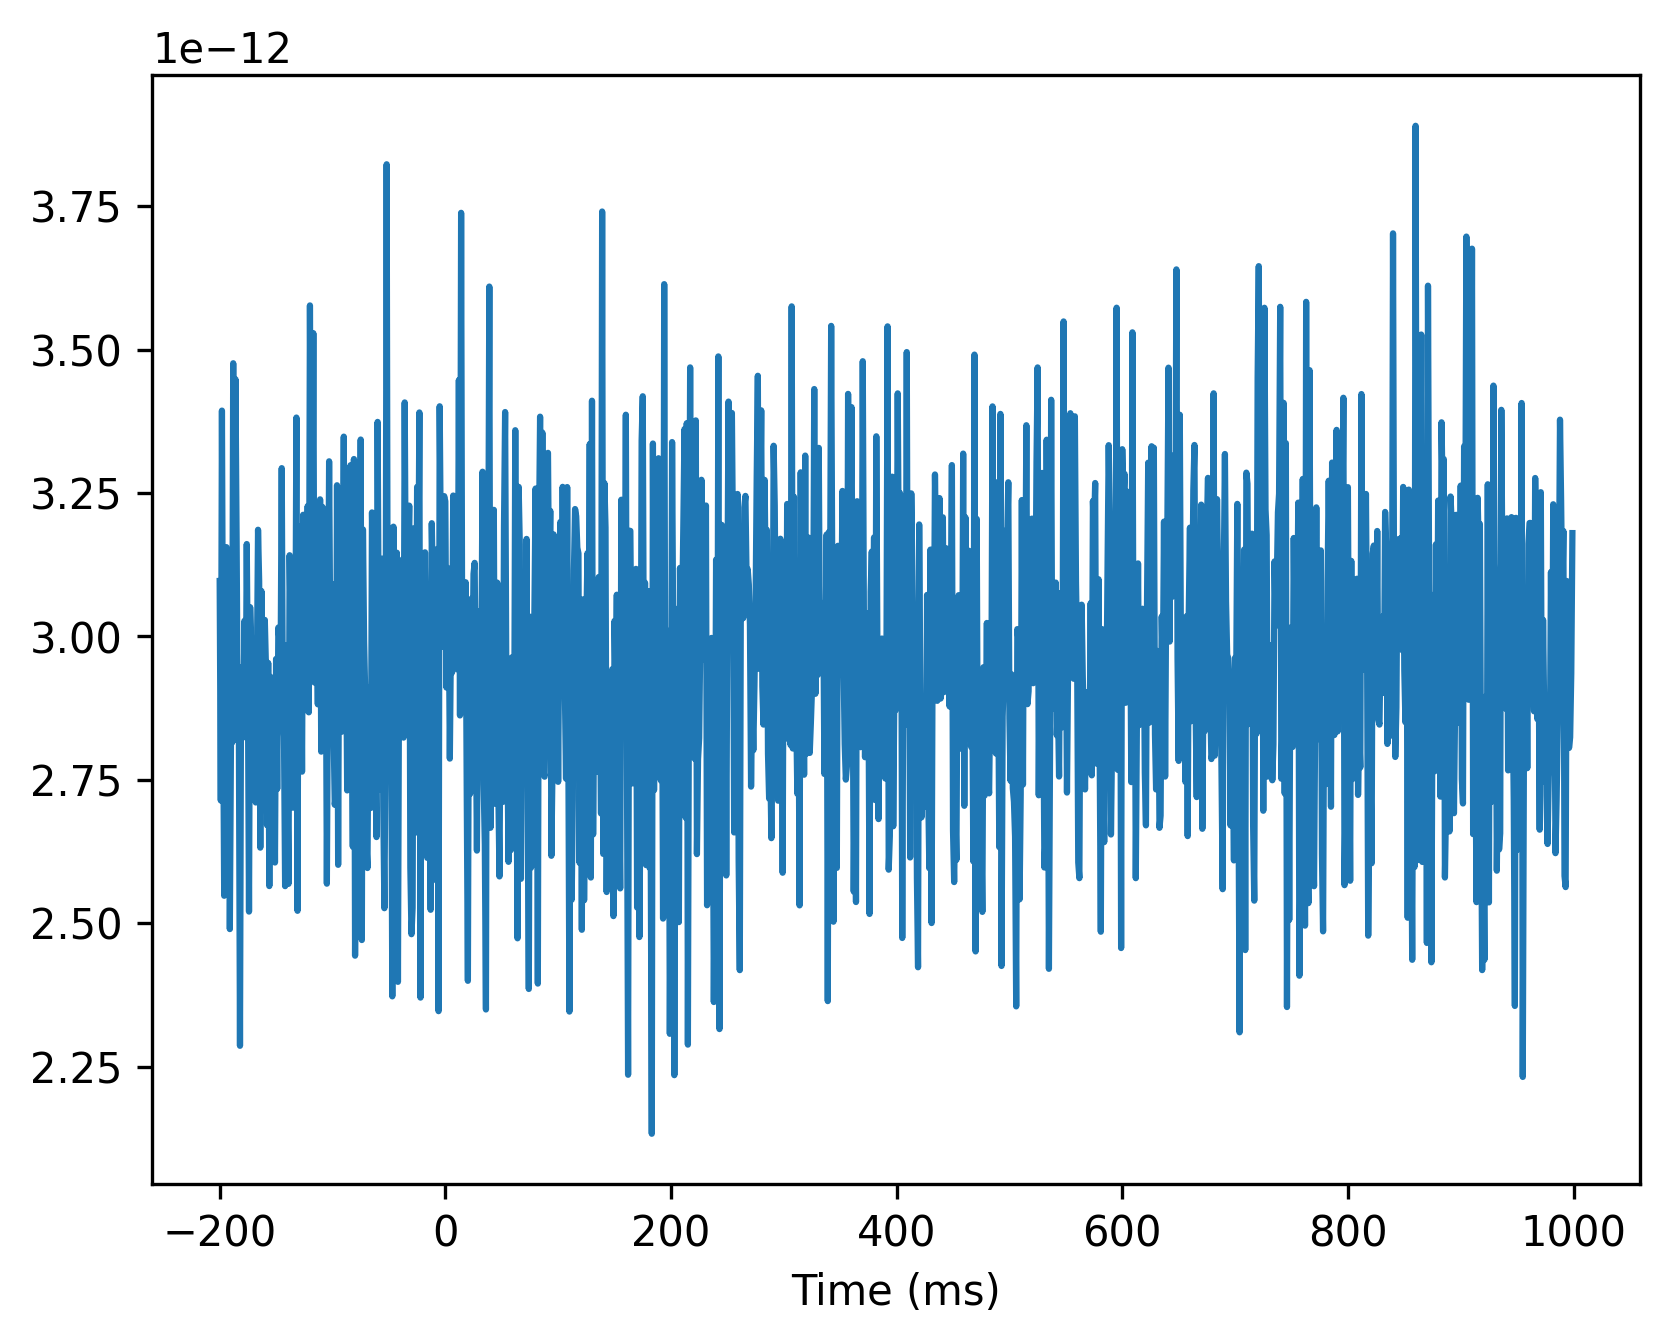

In [26]:
data_var = np.var(data, axis=0)
plt.plot(times, data_var)
plt.xlabel('Time (ms)')
plt.show()

#### 计算100个被试的ERP的标准差

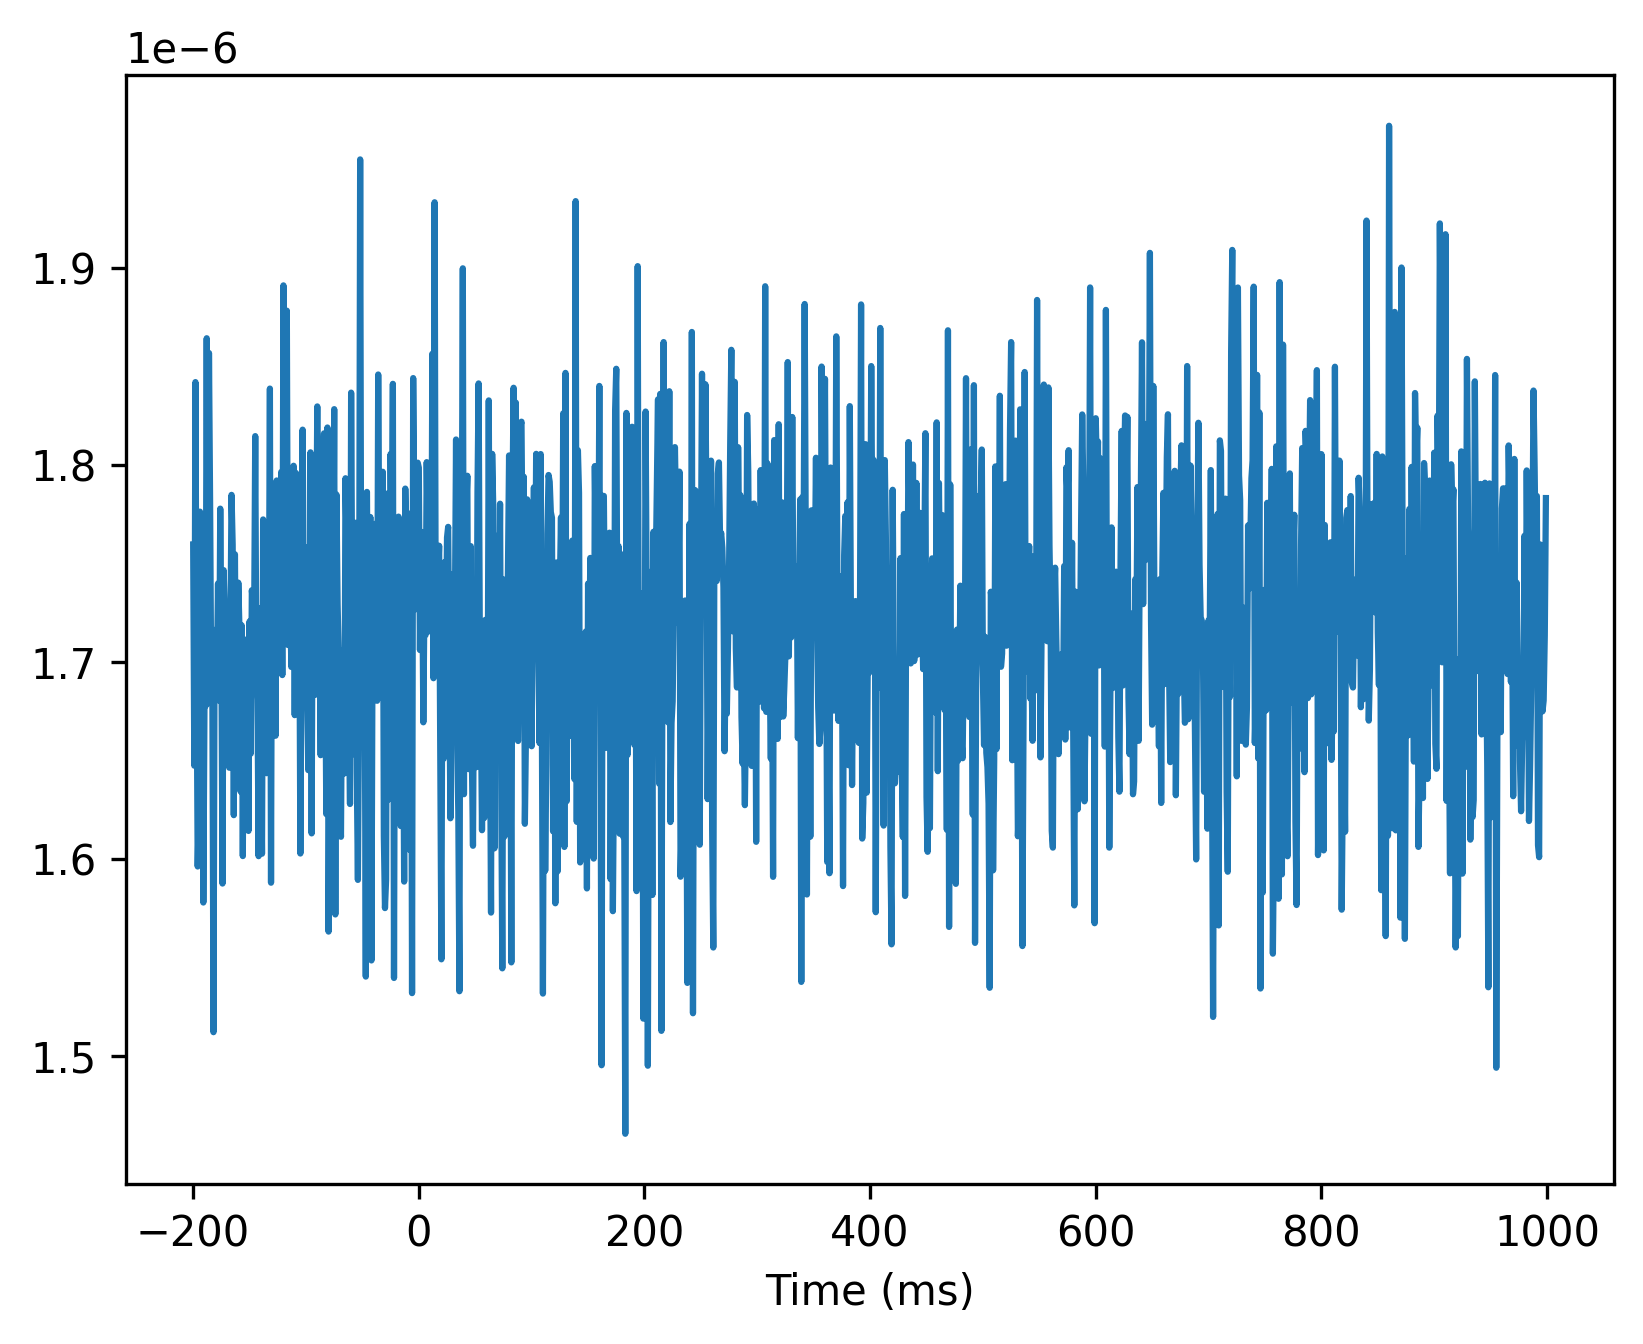

In [27]:
data_std = np.std(data, axis=0)
plt.plot(times, data_std)
plt.xlabel('Time (ms)')
plt.show()

#### 计算100个被试的ERP的标准误

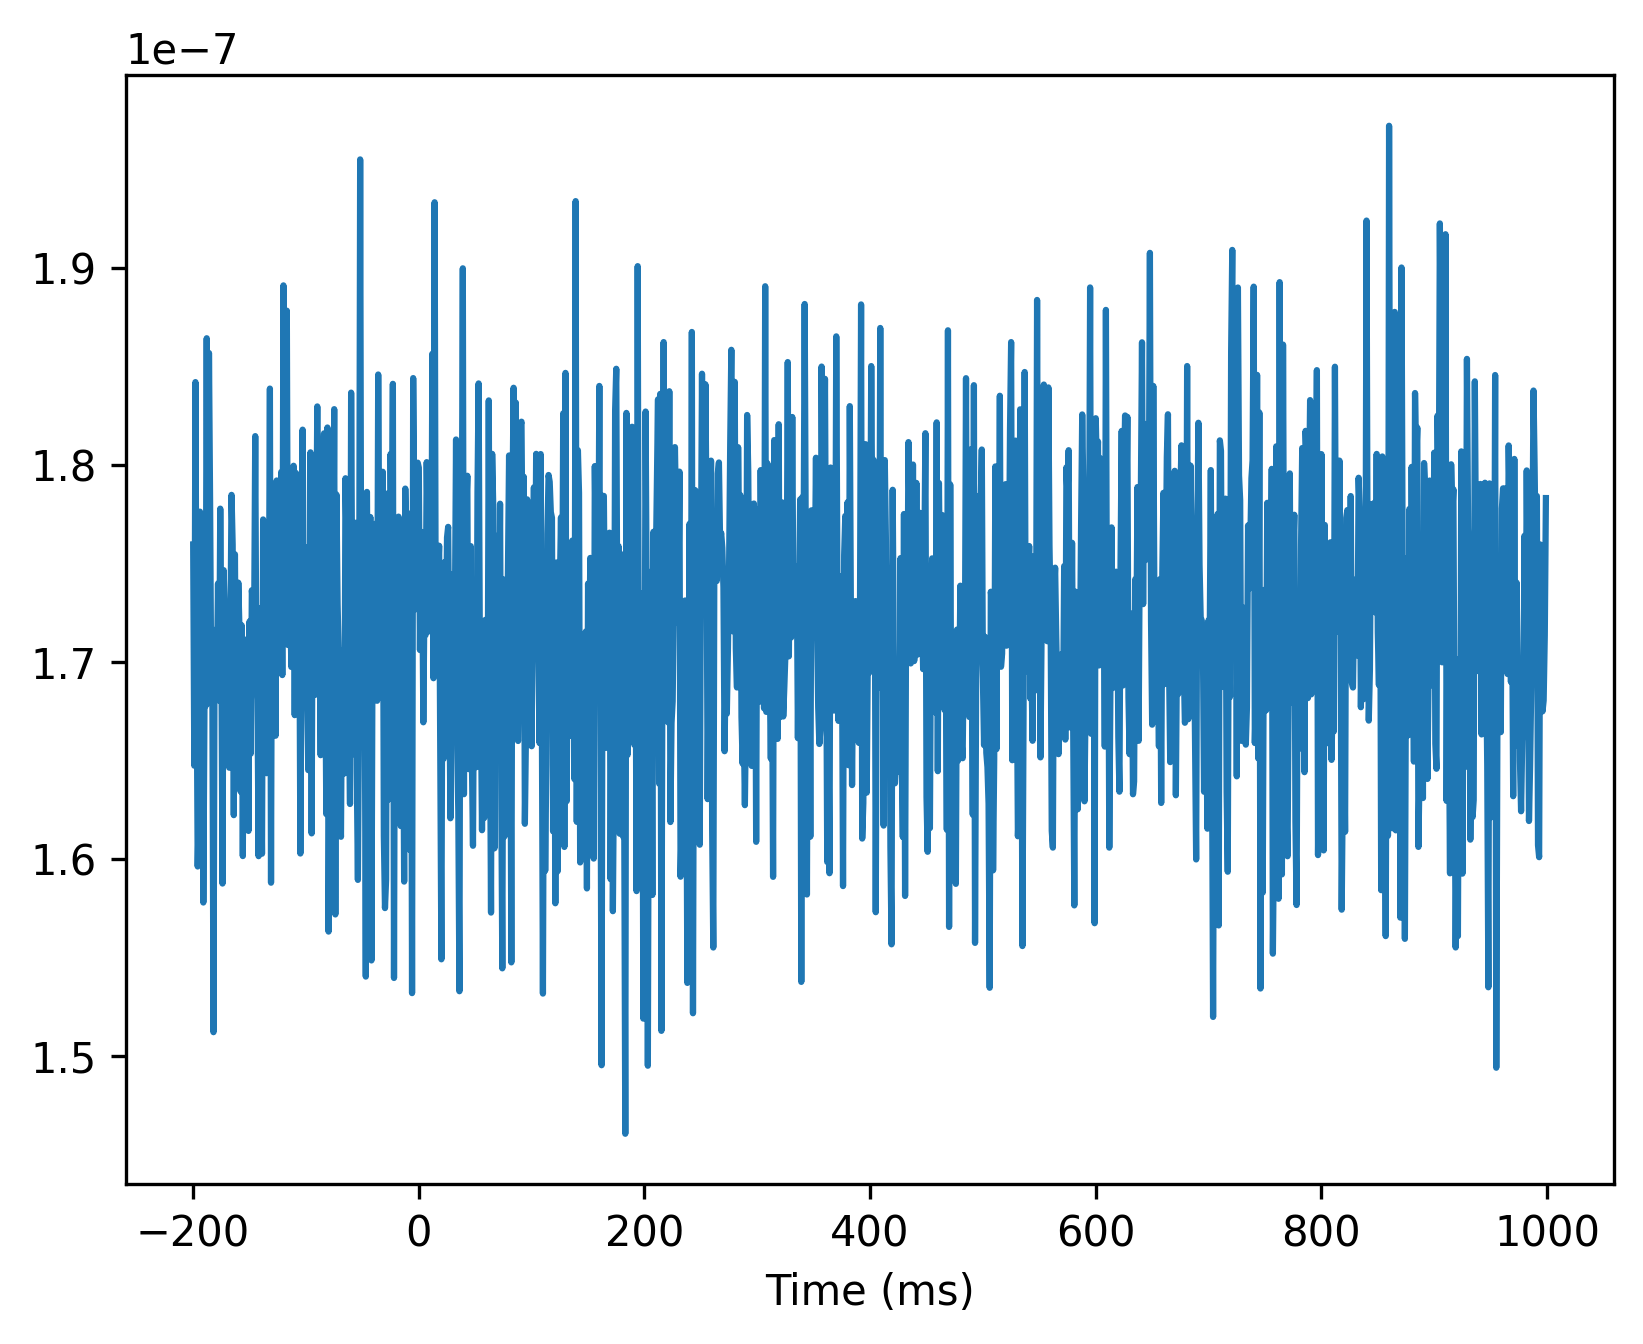

In [28]:
n_subjects = 100
data_sem = np.std(data, axis=0, ddof=0)/np.sqrt(n_subjects)
plt.plot(times, data_sem)
plt.xlabel('Time (ms)')
plt.show()

## 推断性统计

在EEG研究中，除了对脑电数据的均值和离散程度进行计算外，还经常涉及到对总体特征的一些推断  
对一些基本概念不再赘述，下面仅对常用的显著性检验方法进行介绍

### 单群组检验

当需要检验某一条件下的数据是否显著与某个特定的值不同，  
常使用单样本t检验或置换检验(permutation_test)  
这里，类似前面的例子，我们再次随机生成20个被试的1200个时间点的数据进行后续示例

In [29]:
# 生成随机范围在-0.1到0.4之间的shape为[20, 1200]的数据
data = np.random.uniform(low=-0.5, high=0.55, size=(20, 1200))

#### 参数检验方法：单样本t检验（未矫正）

进行逐时间点假设数据的值大于0的统计检验

(1200,)


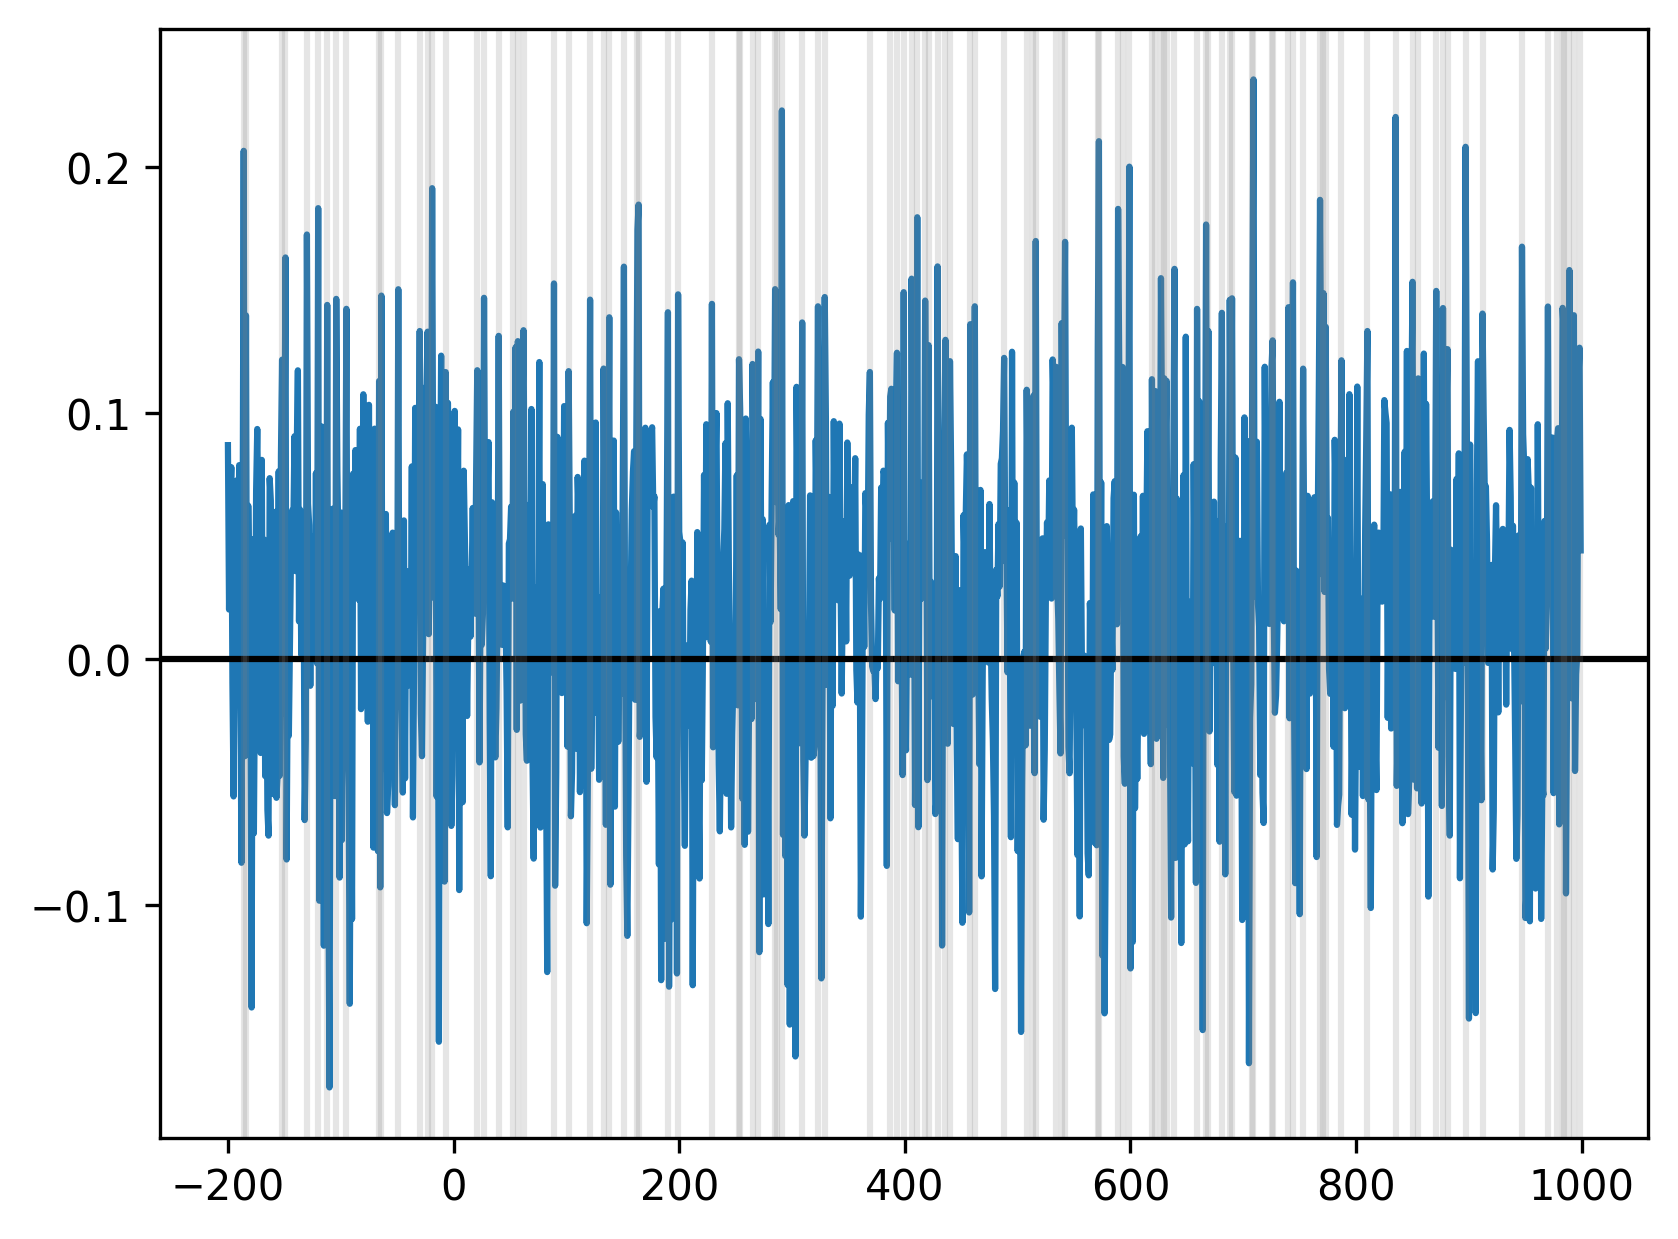

In [30]:
# 单样本t检验
t_vals, p_vals = ttest_1samp(data, 0, axis=0, alternative='greater')
# 打印出p_vals的shape：[1200]对应1200个时间点
print(np.shape(p_vals))
# 可视化统计检验后结果
# 阴影竖线代表显著的时间点
plt.plot(times, np.average(data, axis=0))
plt.axhline(y=0, color='black')
for i, p_val in enumerate(p_vals):
    if p_val < 0.05:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.show()

#### 非参数检验方法：置换检验 permutation test（未矫正）

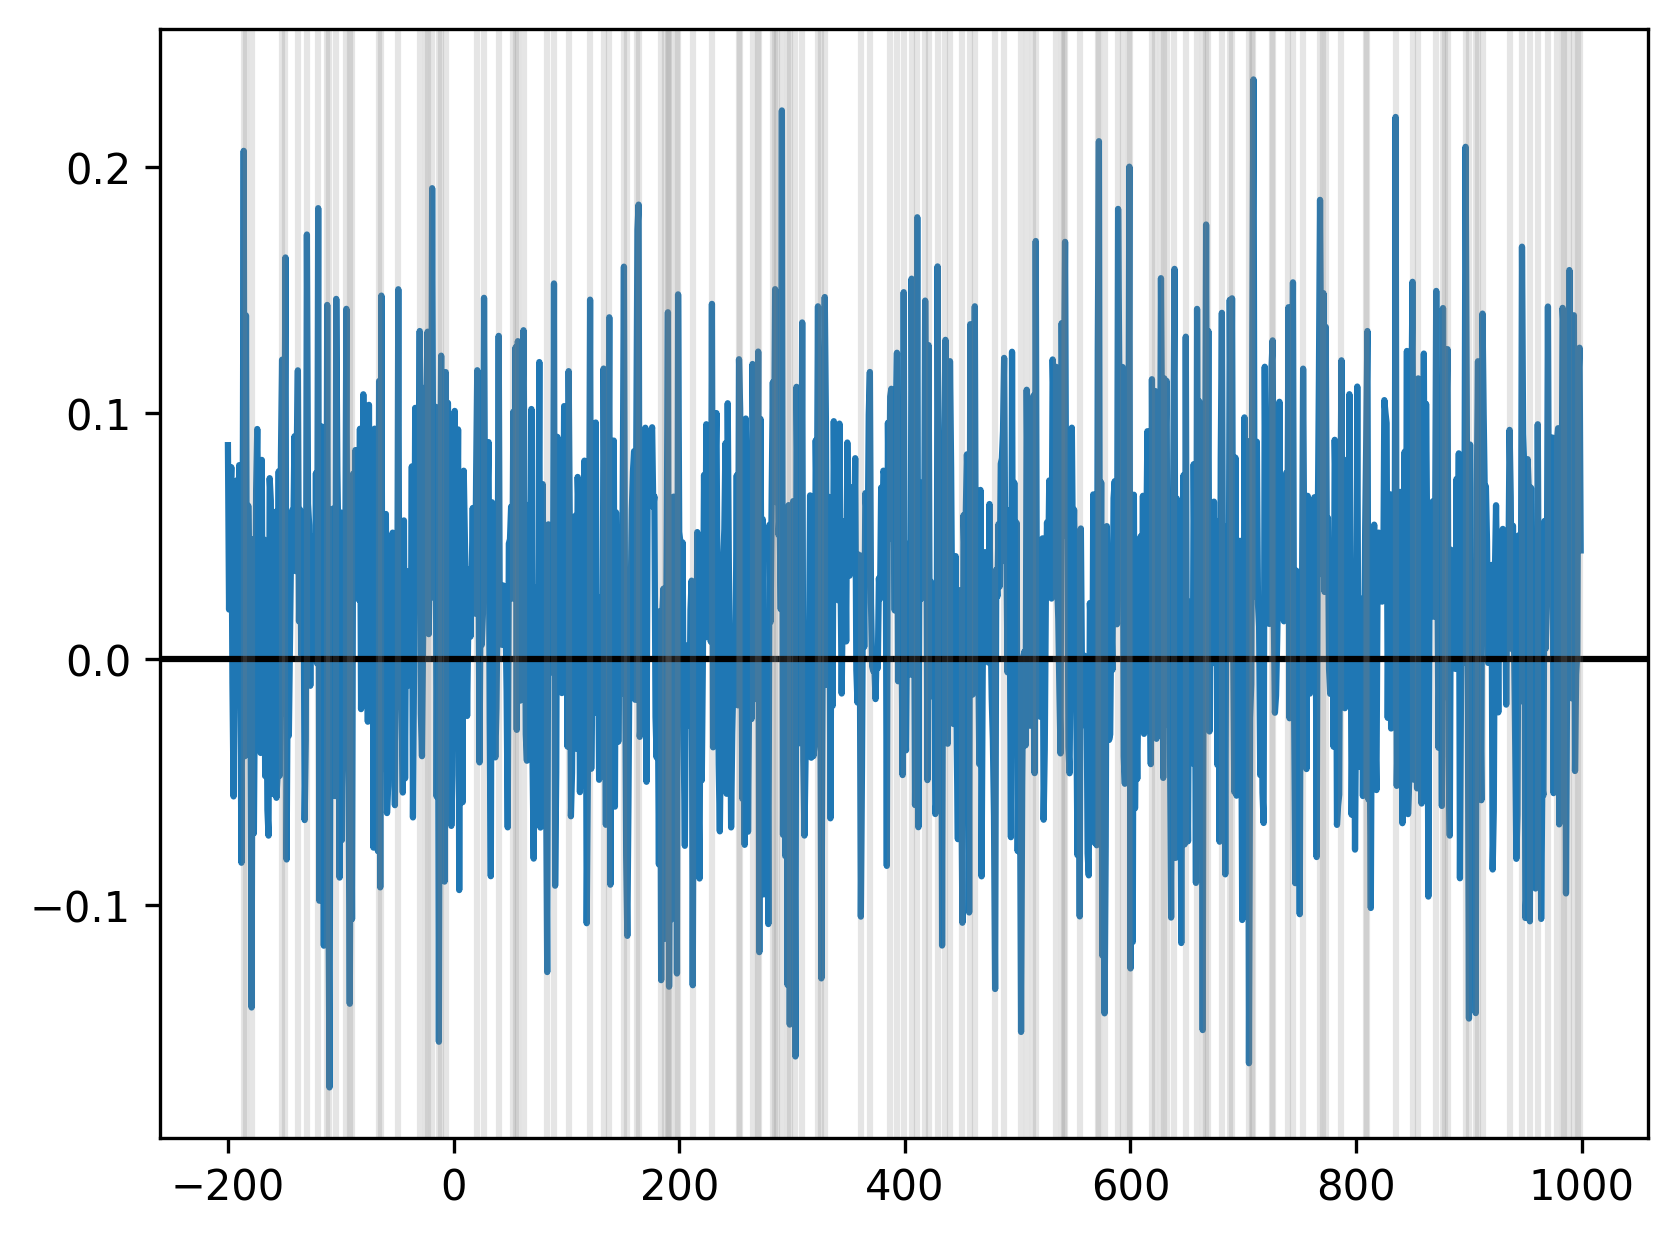

In [31]:
# 使用NeuroRA的stuff模块下的permutation_test()函数进行置换检验
# 生成一个shape为[20]的全0向量
zeros = np.zeros([20])
# 初始化一个p_vals用于存储计算得到的p值
p_vals = np.zeros([1200])
# 逐时间点计算p值
for t in range(1200):
    p_vals[t] = permutation_test(data[:, t], zeros)
# 可视化统计检验后结果
plt.plot(times, np.average(data, axis=0))
plt.axhline(y=0, color='black')
for i, p_val in enumerate(p_vals):
    if p_val < 0.05:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.show()

但若进行探索性分析时，希望找到有显著差异的时间点，这时需要对结果进行校正以避免多重比较带来的假阳性  
常用的方法有以下三种：

- 控制族错误率（familywise error rate, FWER）的Bonferroni校正
- 控制错误发现率（False discovery rate, FDR）的FDR校正
- 基于簇的置换检验（cluster-based permutation test）

#### Bonferroni（FWER）矫正

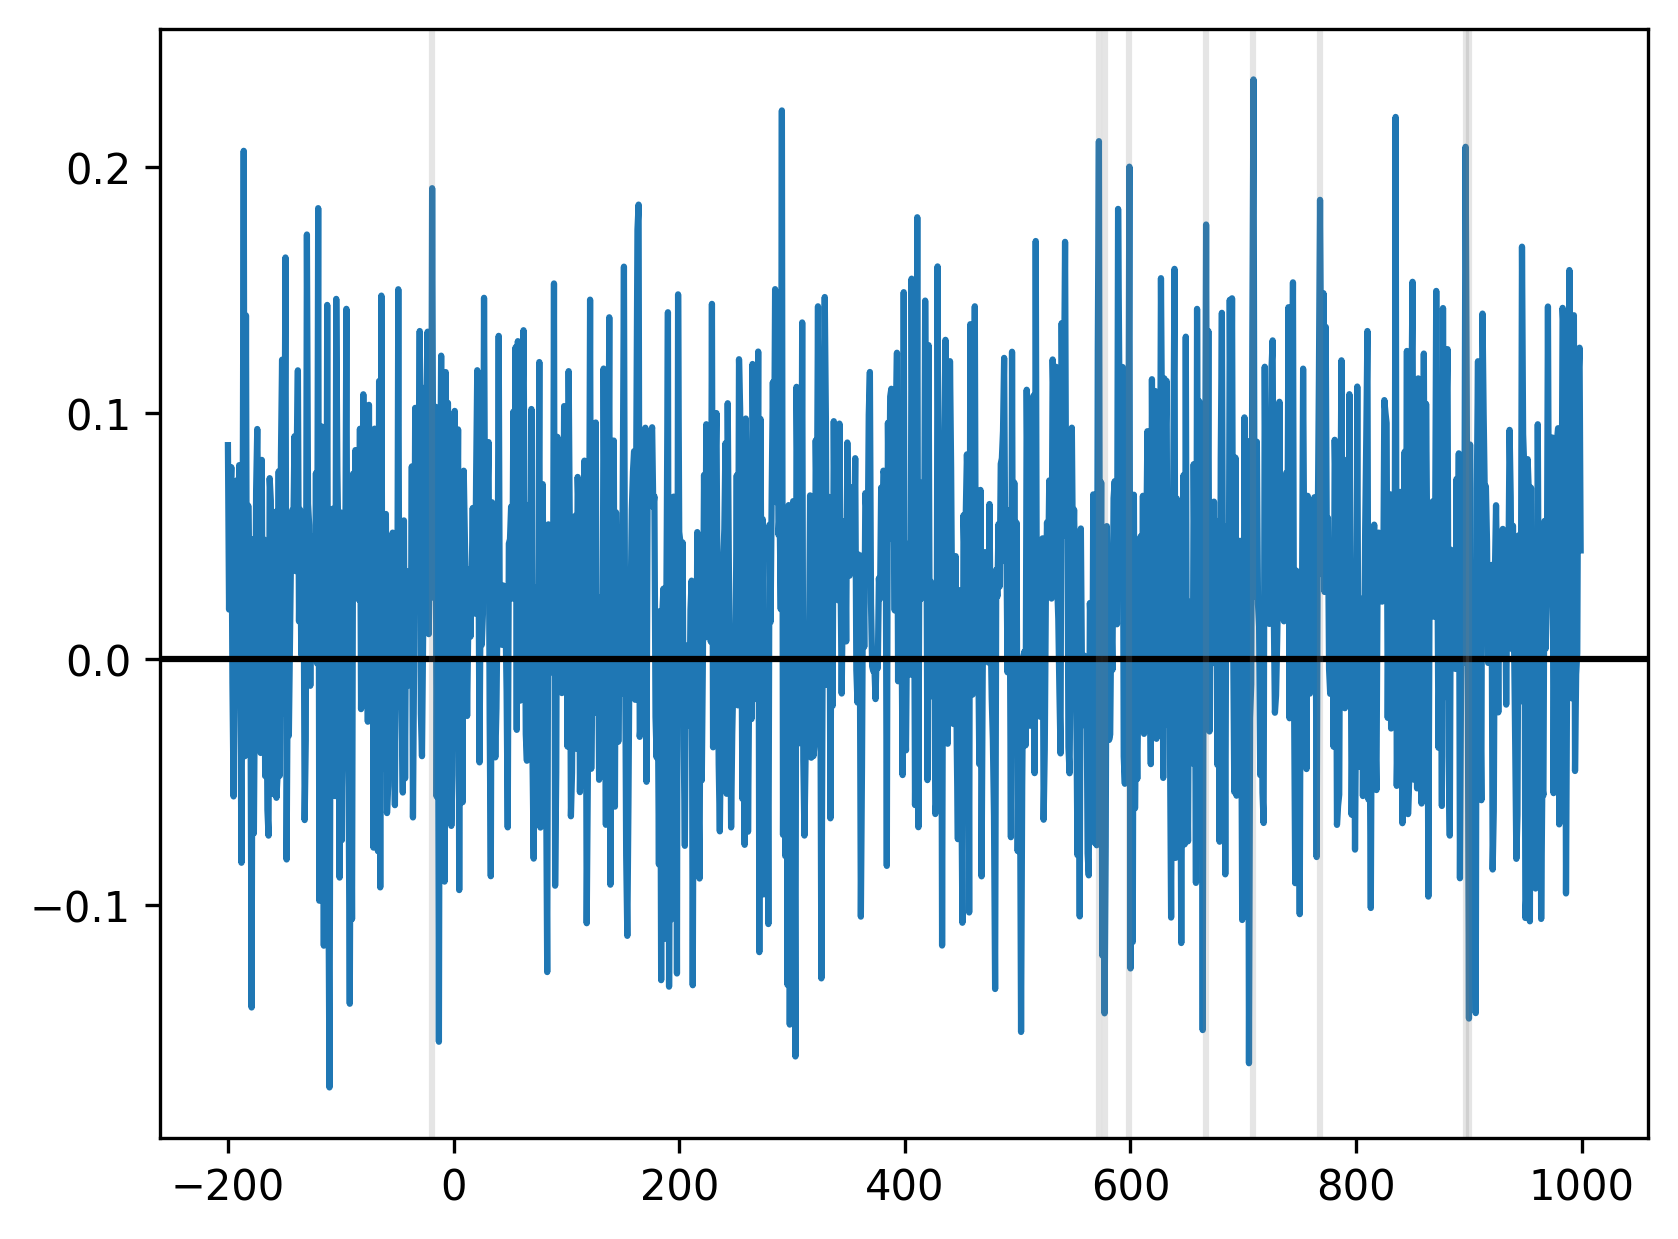

In [32]:
# Bonferrorni校正只需要把p值乘以进行统计检验的次数
# 这里即乘以时间点数
p_bf_corrected_vals = p_vals*len(times)
# 可视化经过矫正的统计检验结果
plt.plot(times, np.average(data, axis=0))
plt.axhline(y=0, color='black')
for i, p_val in enumerate(p_bf_corrected_vals):
    if p_val < 0.05:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.show()

#### FDR矫正

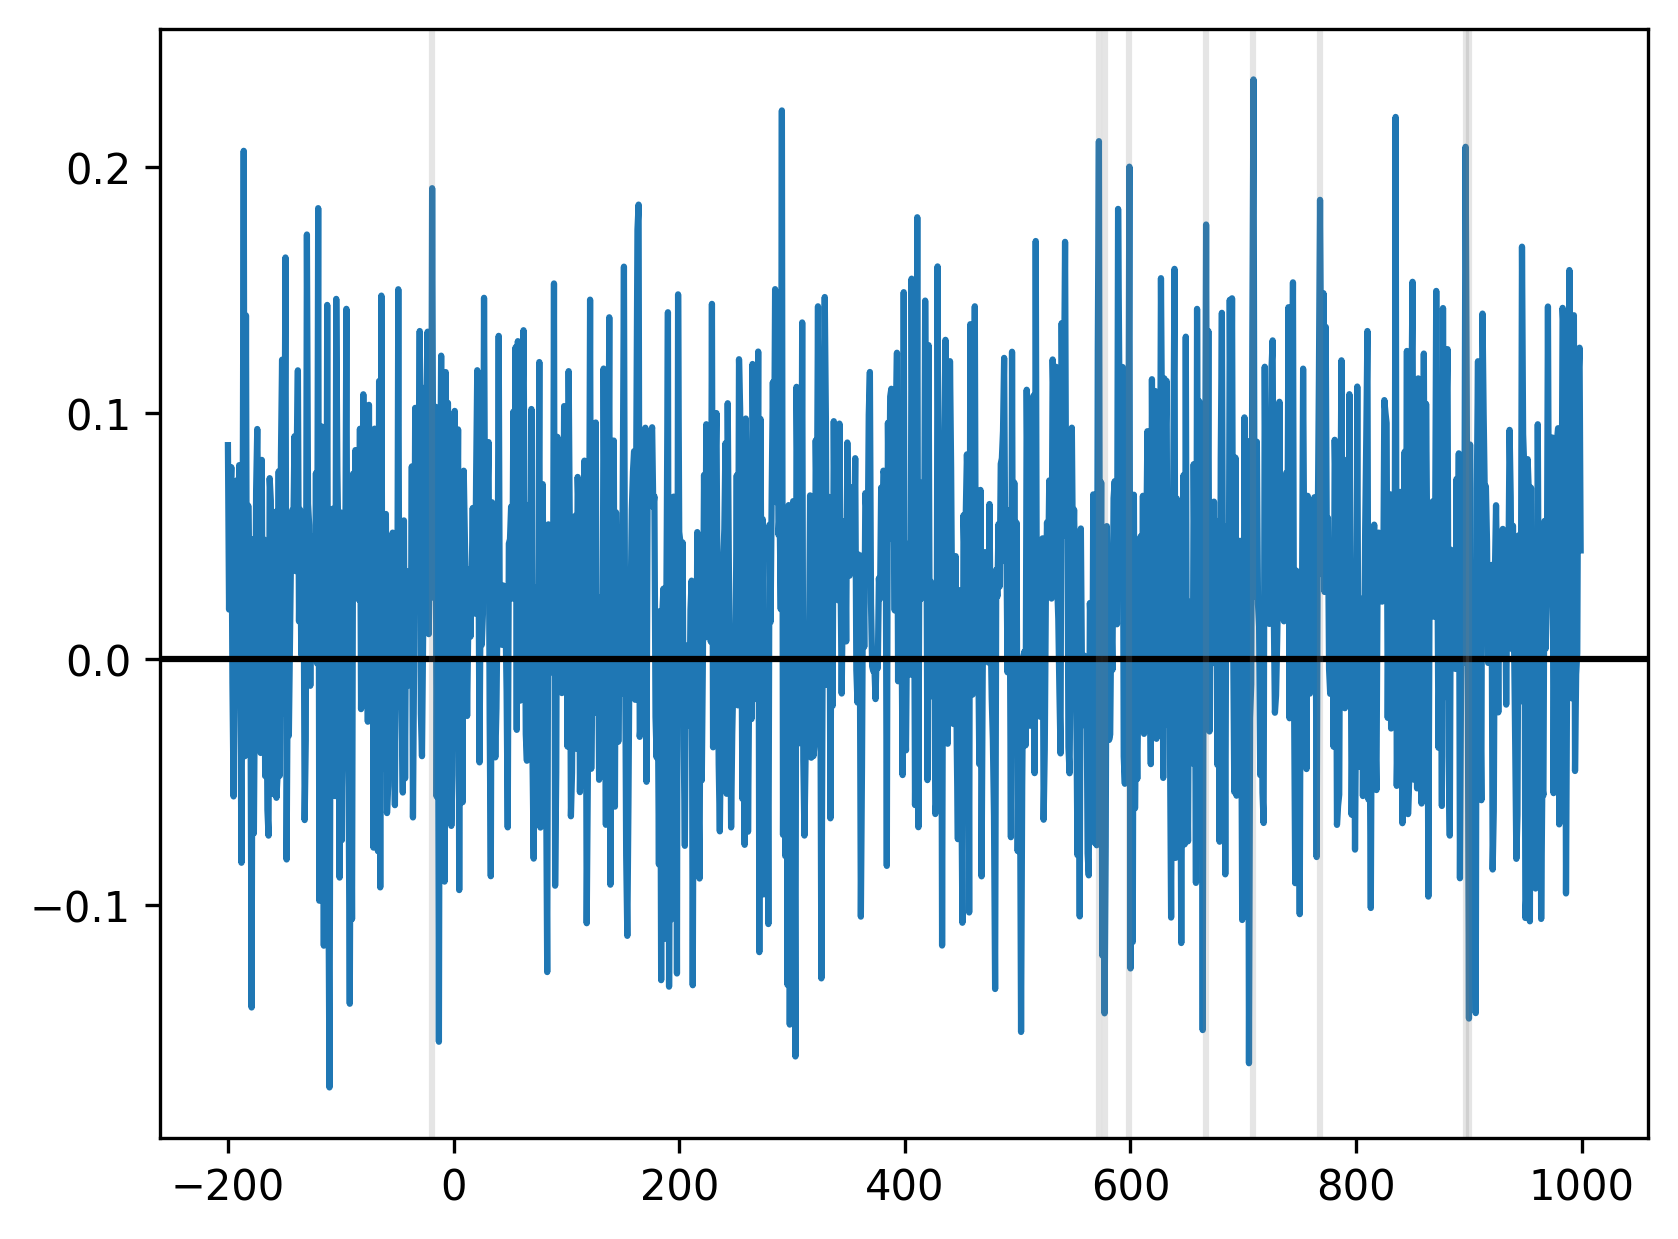

In [33]:
# FDR校正可以使用MNE中stats模块下的fdr_correlation()函数实现
# 其第一个返回值为是否通过矫正的布尔型数组（True为矫正后仍显著），第二个返回值为矫正后的p值
rejects, p_fdr_corrected_vals = fdr_correction(p_vals, alpha=0.05)
# 可视化经过矫正的统计检验结果
plt.plot(times, np.average(data, axis=0))
plt.axhline(y=0, color='black')
for i, p_val in enumerate(p_fdr_corrected_vals):
    if p_val < 0.05:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.show()

#### 基于簇的置换检验


Permutation test
Calculating: [====================================================================================================] 100.00%
Cluster-based permutation test finished!



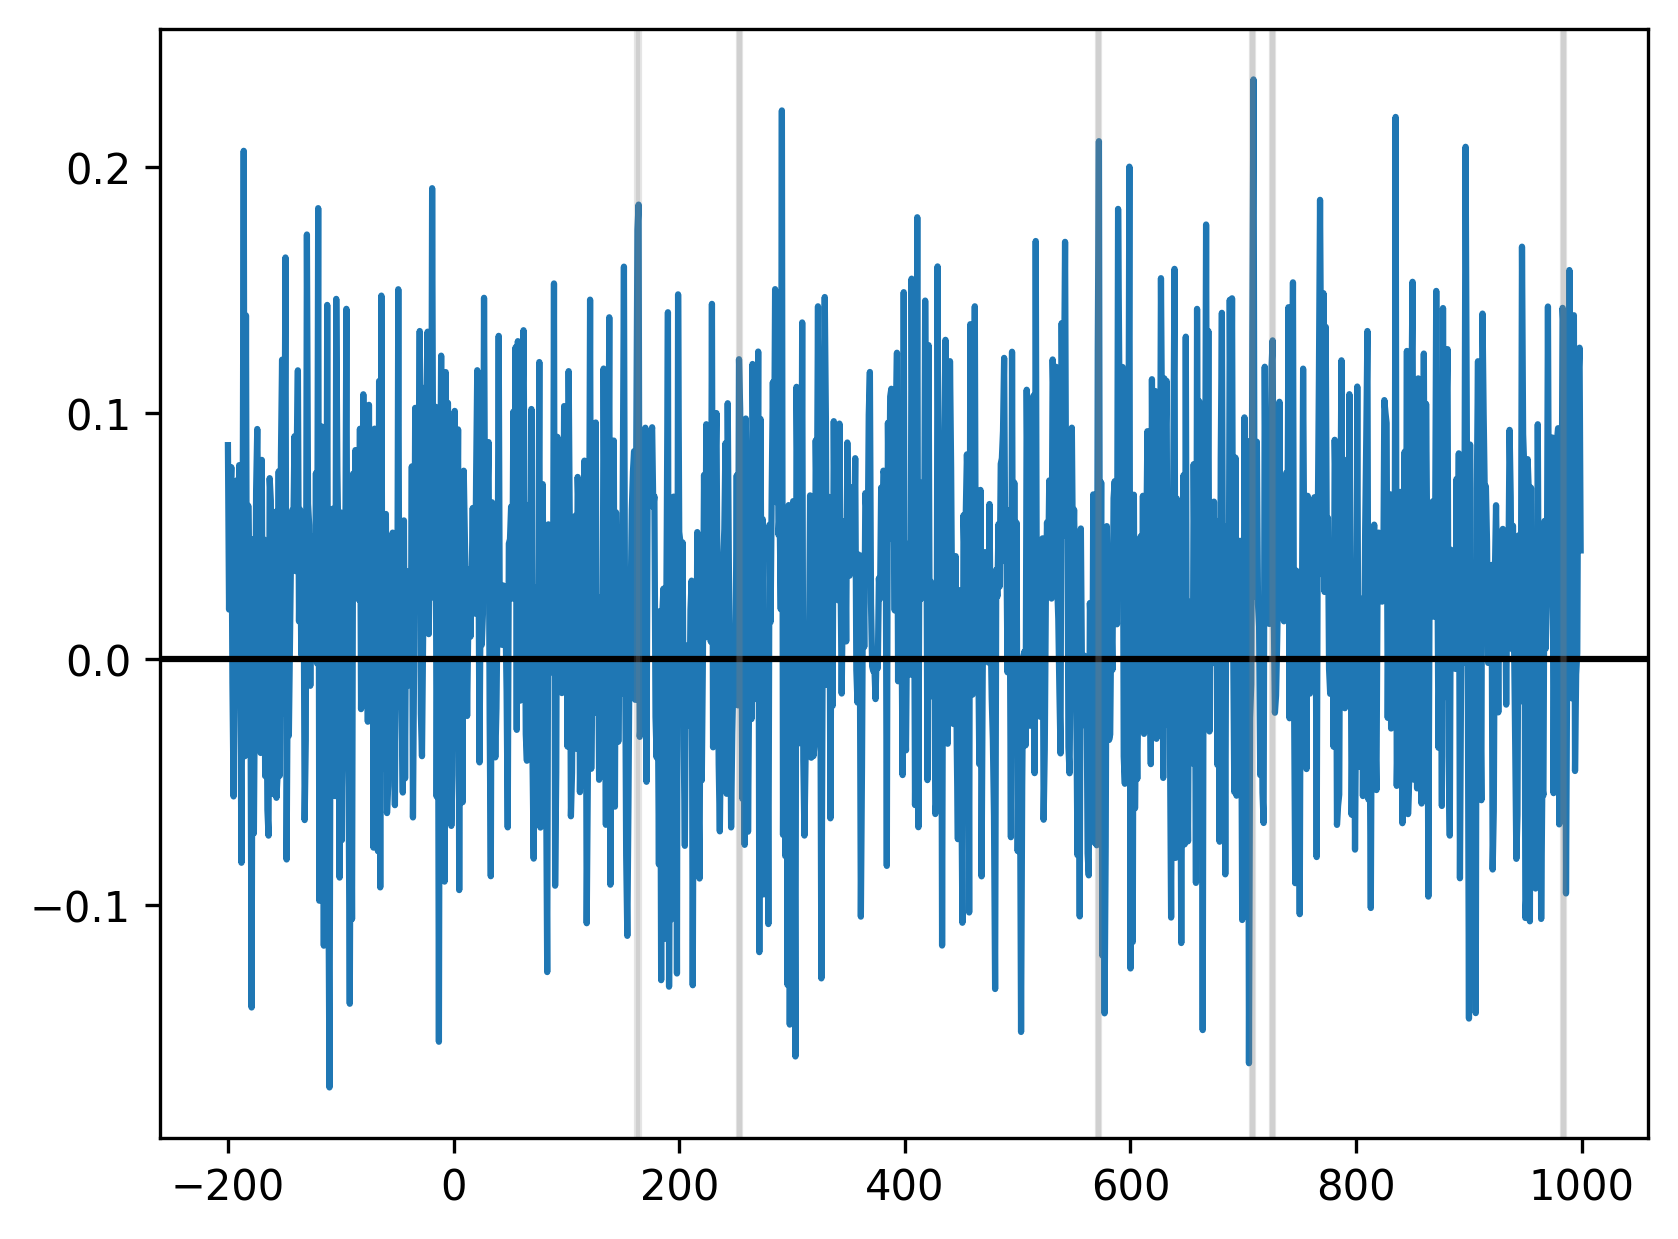

In [34]:
# 这里时序（1维）数据的单样本单边Cluster-based permutation test
# 可以通过NeuroRA中stuff模块下clusterbased_permutation_1d_1samp_1sided()函数实现
# 其需要输入的是用来做统计的数据（即这里的data），输出是是矫正后是否显著的矩阵（1为显著的点）
# 这里先使用p<0.05的阈值来选取clusters，对应参数设置为p_threshold=0.05
# 再用p<0.05的阈值来进行基于cluster的矫正，对应参数为clusterp_threshold=0.05
rejects = clusterbased_permutation_1d_1samp_1sided(data, level=0, 
                                                   p_threshold=0.05, 
                                                   clusterp_threshold=0.05)
# 可视化经过矫正的统计检验结果
plt.plot(times, np.average(data, axis=0))
plt.axhline(y=0, color='black')
for i, reject in enumerate(rejects):
    if reject == 1:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.show()

### 比较两条件/群组间是否有差异

当需要比较两个条件下的脑活动是否存在显著差异时  
可以使用独立样本t检验(条件为被试间变量)、配对样本t检验（条件为被试内变量）、置换检验

#### 参数检验方法：独立样本t检验（FDR 校正）

这里随机生成两组虚假脑电数据  
假设它们分别为正常人组（对应data1）和病人组（对应data2）的数据  
正常人组有20个被试，病人组有18个被试，epoch长度依然为1200ms（1200个时间点，从-200ms到1000ms）

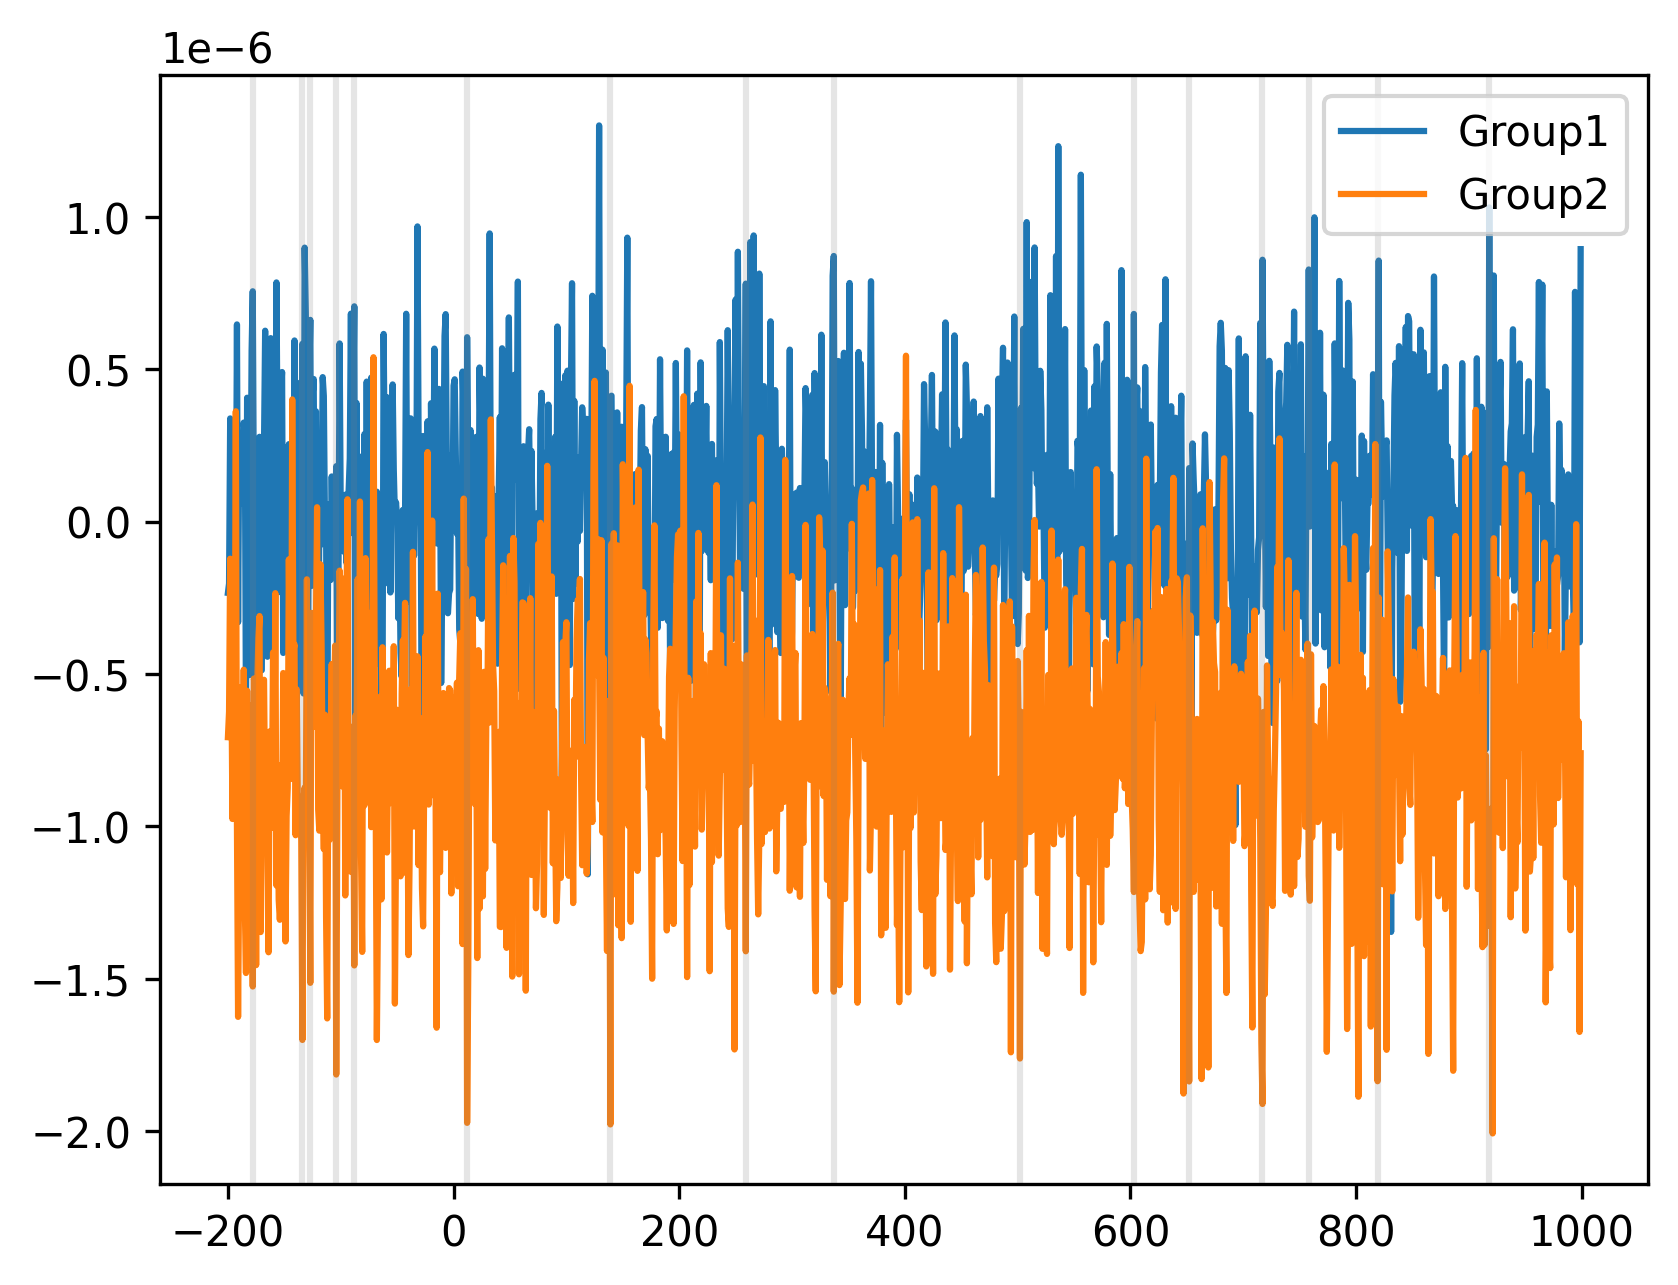

In [35]:
# 生成虚假（随机）数据
data1 = np.random.uniform(low=-3e-6, high=3e-6, size=(20, 1200))
data2 = np.random.uniform(low=-4e-6, high=2.5e-6, size=(18, 1200))
# 独立样本t检验
t_vals, p_vals = ttest_ind(data1, data2, axis=0)
# FDR矫正
rejects, p_fdr_corrected = fdr_correction(p_vals, alpha=0.05)
# 可视化经过矫正的统计检验结果
plt.plot(times, np.average(data1, axis=0), label='Group1')
plt.plot(times, np.average(data2, axis=0), label='Group2')
for i, reject in enumerate(rejects):
    if reject == True:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.legend()
plt.show()

#### 参数检验方法：配对样本t检验（FDR 校正）

这里随机生成两组虚假脑电数据  
假设它们分别为同一组被试在不同条件下的数据（条件1对应data1，条件2对应data2）  
被试数为20，epoch长度依然为1200ms（1200个时间点，从-200ms到1000ms）

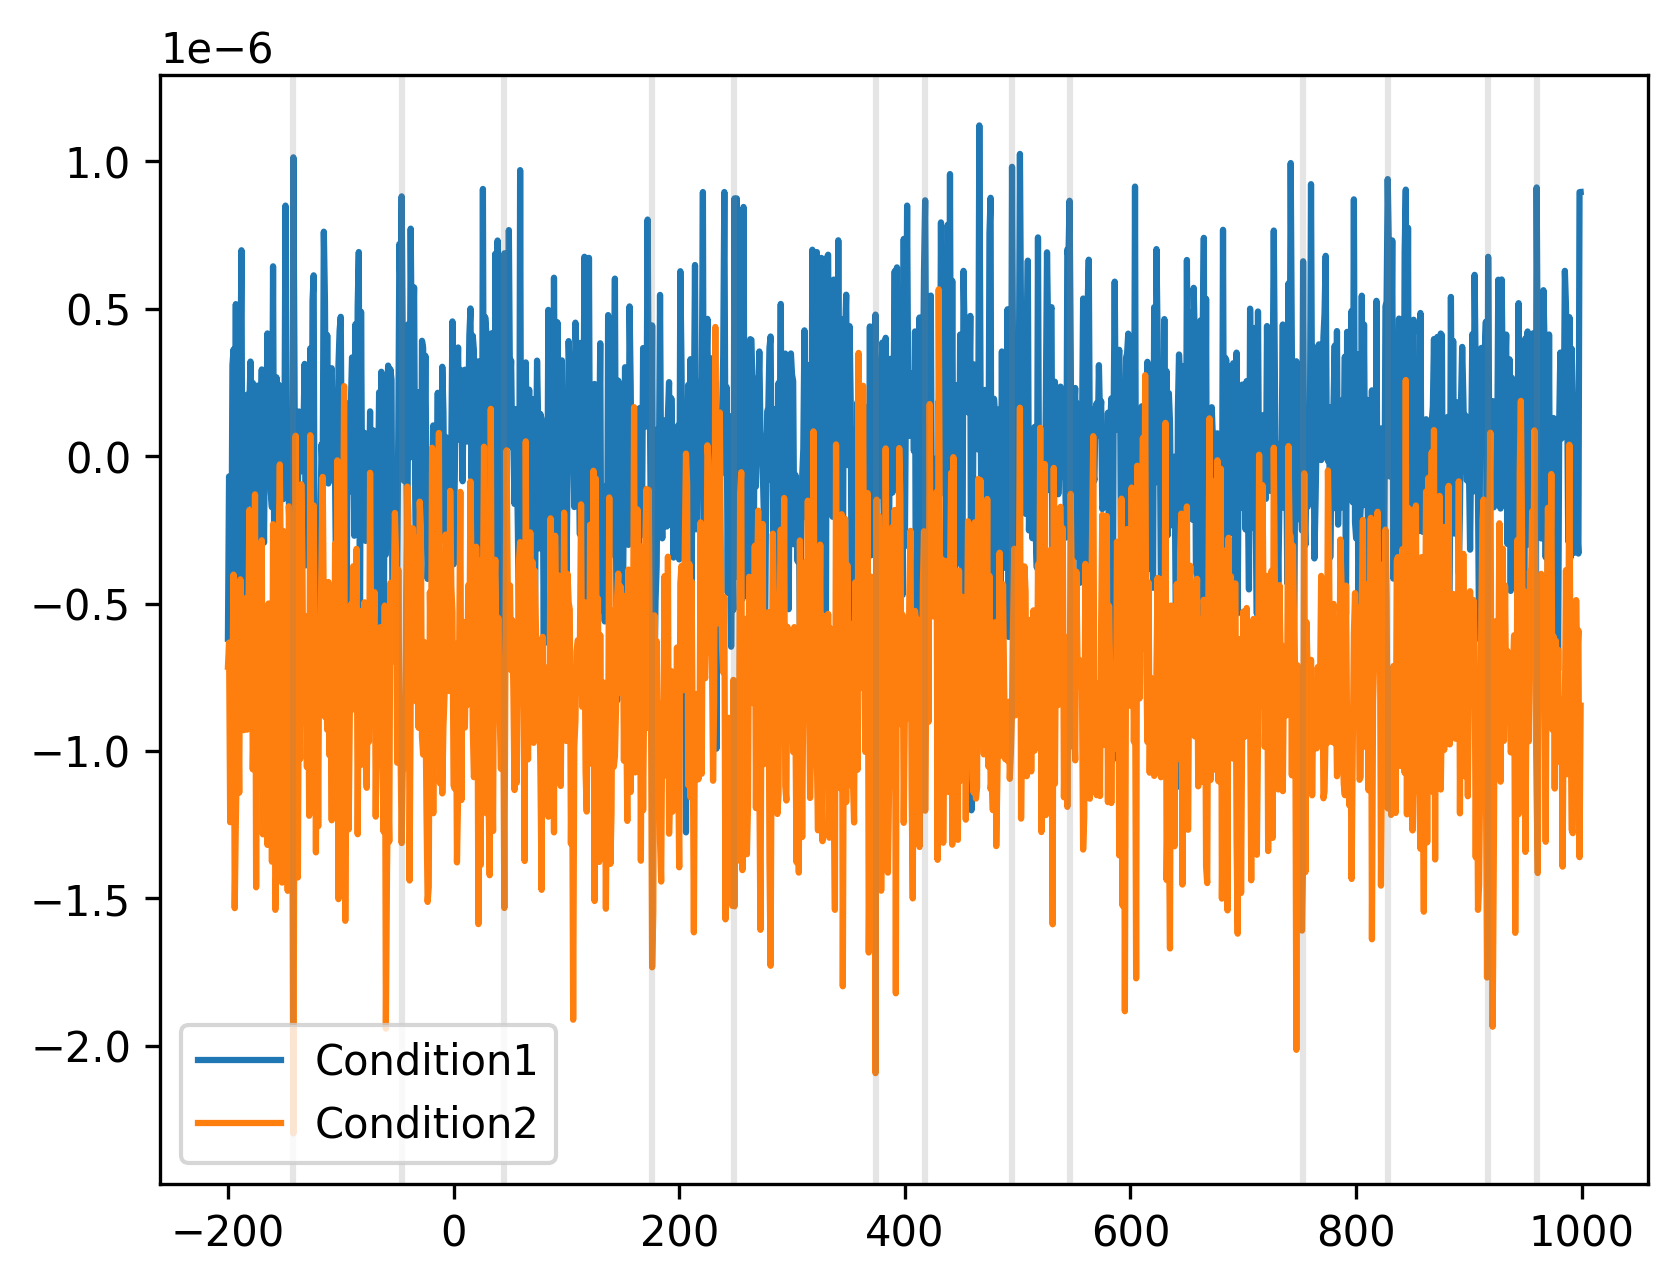

In [36]:
# 生成虚假（随机）数据
data1 = np.random.uniform(low=-3e-6, high=3e-6, size=(20, 1200))
data2 = np.random.uniform(low=-4e-6, high=2.5e-6, size=(20, 1200))
# 配对样本t检验
t_vals, p_vals = ttest_rel(data1, data2, axis=0)
# FDR矫正
rejects, p_fdr_corrected = fdr_correction(p_vals, alpha=0.05)
# 可视化经过矫正后的统计检验结果
plt.plot(times, np.average(data1, axis=0), label='Condition1')
plt.plot(times, np.average(data2, axis=0), label='Condition2')
for i, reject in enumerate(rejects):
    if reject == True:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.legend()
plt.show()

#### 非参数检验方法：置换检验（FDR矫正）

使用上例（配对样本t检验）的虚假数据示例

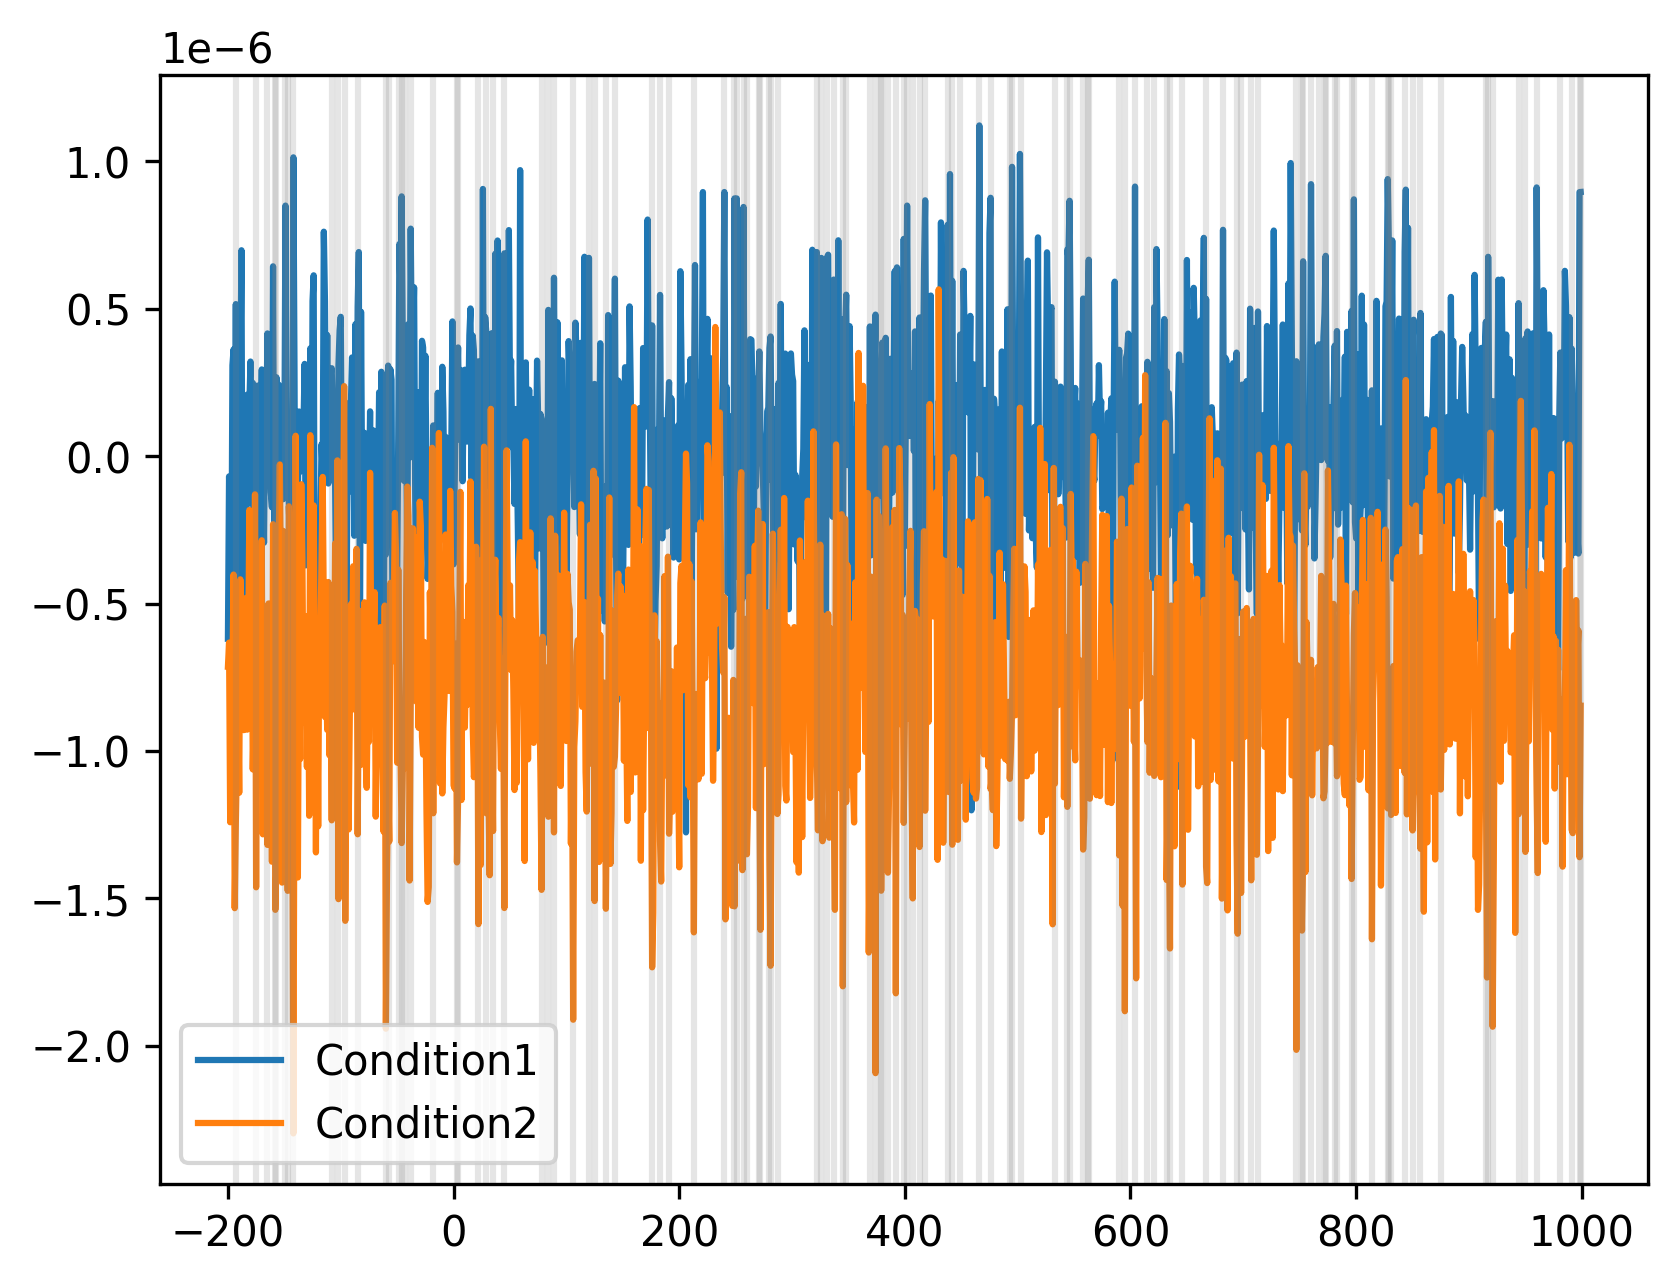

In [37]:
# 初始化一个p_vals用于存储计算得到的p值
p_vals = np.zeros([1200])
# 逐时间点计算p值
for t in range(1200):
    p_vals[t] = permutation_test(data1[:, t], data2[:, t])
# FDR矫正
rejects, p_fdr_corrected = fdr_correction(p_vals, alpha=0.05)
# 可视化经过矫正的统计检验结果
plt.plot(times, np.average(data1, axis=0), label='Condition1')
plt.plot(times, np.average(data2, axis=0), label='Condition2')
for i, reject in enumerate(rejects):
    if reject == 1:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.legend()
plt.show()

### 对比多个条件/群组间有无显著差异

#### 参数检验方法：单因素方差分析（FDR矫正）

这里，类似前例，生成同一组被试在三种不同实验条件下的虚假脑电数据（分别对应data1、data2和data3）  
被试量为20，epoch长度为1200ms（1200个时间点，从-200ms到1000ms）

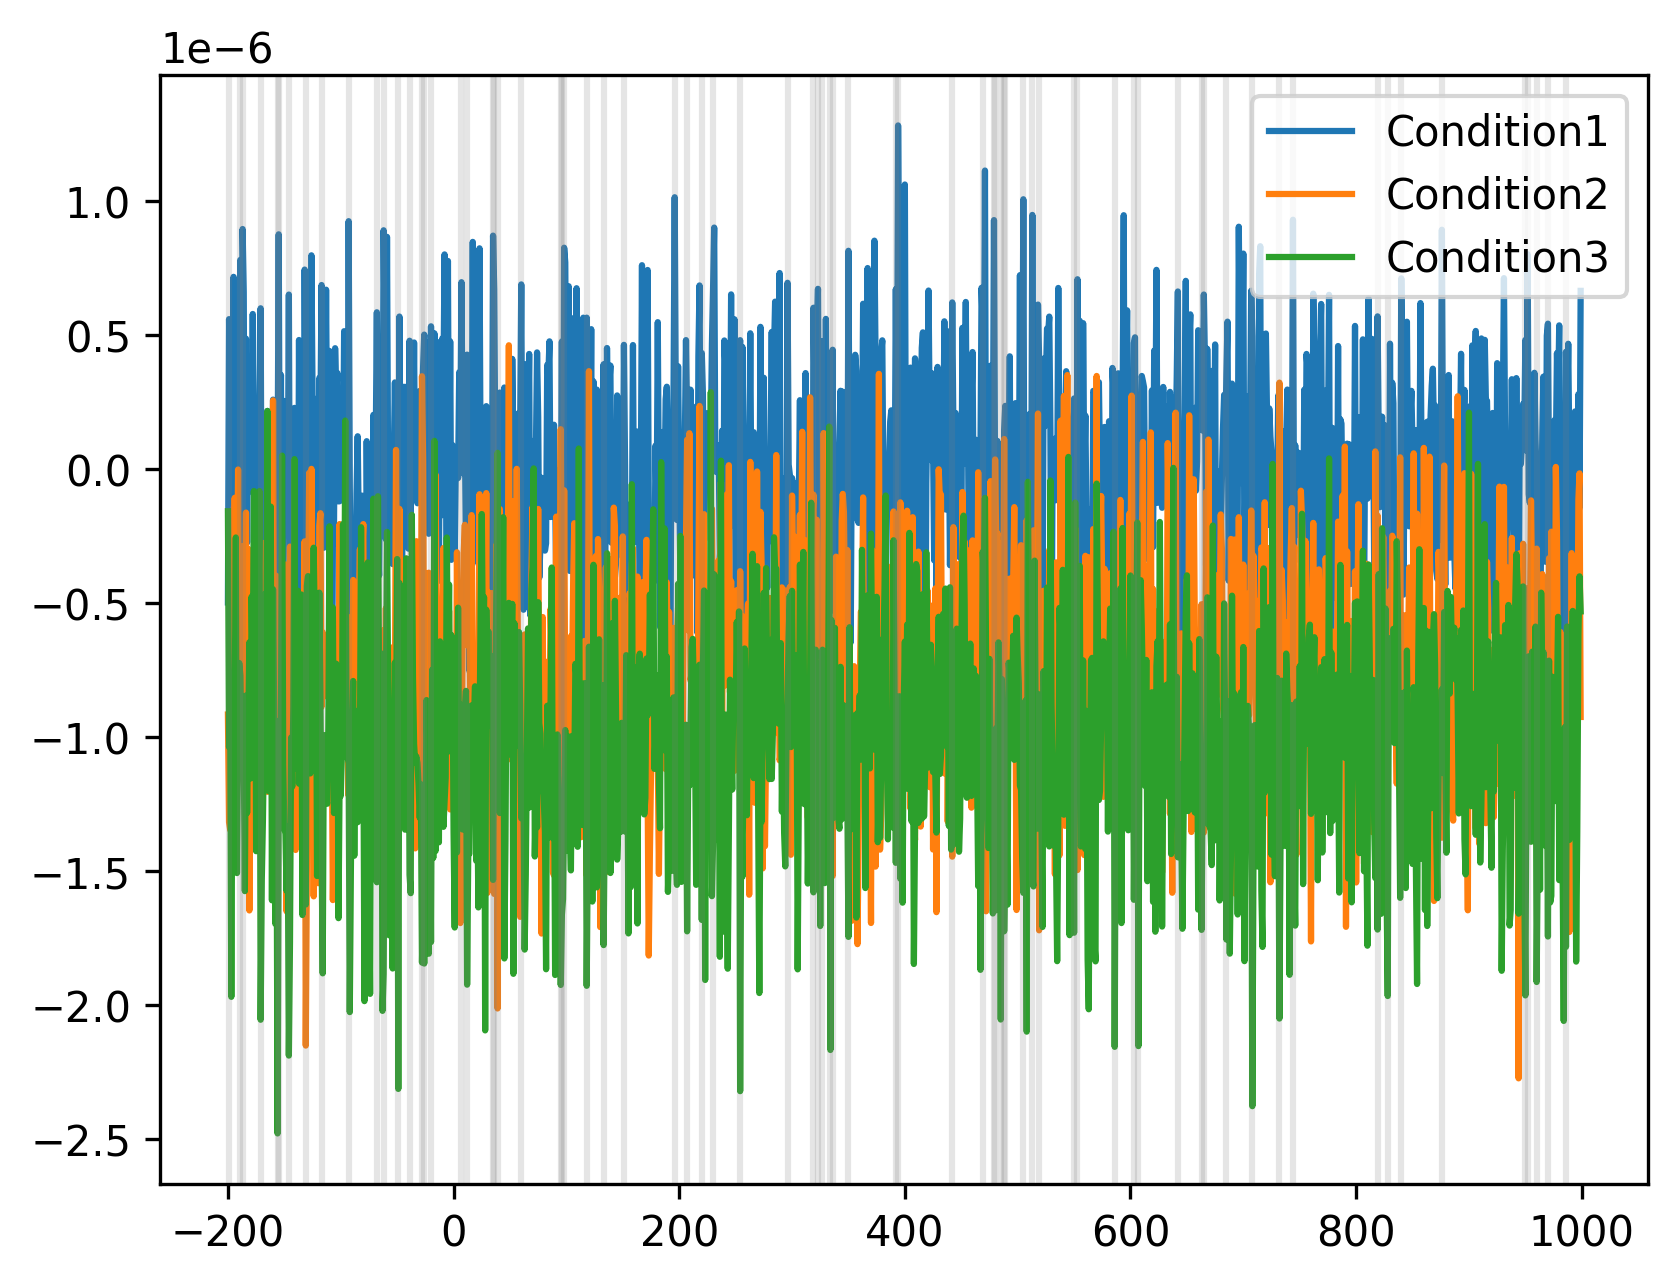

In [38]:
# 生成虚假（随机）数据
data1 = np.random.uniform(low=-3e-6, high=3e-6, size=(20, 1200))
data2 = np.random.uniform(low=-4e-6, high=2.5e-6, size=(20, 1200))
data3 = np.random.uniform(low=-4.5e-6, high=2.5e-6, size=(20, 1200))
# 单因素F检验
f_vals, p_vals = f_oneway(data1, data2, data3, axis=0)
# FDR矫正
rejects, p_fdr_corrected = fdr_correction(p_vals, alpha=0.05)
# 可视化经过矫正的统计检验结果
plt.plot(times, np.average(data1, axis=0), label='Condition1')
plt.plot(times, np.average(data2, axis=0), label='Condition2')
plt.plot(times, np.average(data3, axis=0), label='Condition3')
for i, reject in enumerate(rejects):
    if reject == True:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.legend()
plt.show()

### 多因素设计：两因素的主效应与交互效应

#### 参数检验方法：2×2重复测量方差分析（FDR矫正）

假设有两个被试内变量：A和B  
A有两个水平：A1, A2; B有两个水平：B1, B2  
这里类似上面，随机生一组被试4种条件下（A1B1、A1B2、A2B1、A2B2）的虚假脑电数据  
被试数为200，epoch长度为1200ms（1200个时间点，从-200ms到1000ms）

/Users/zitonglu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


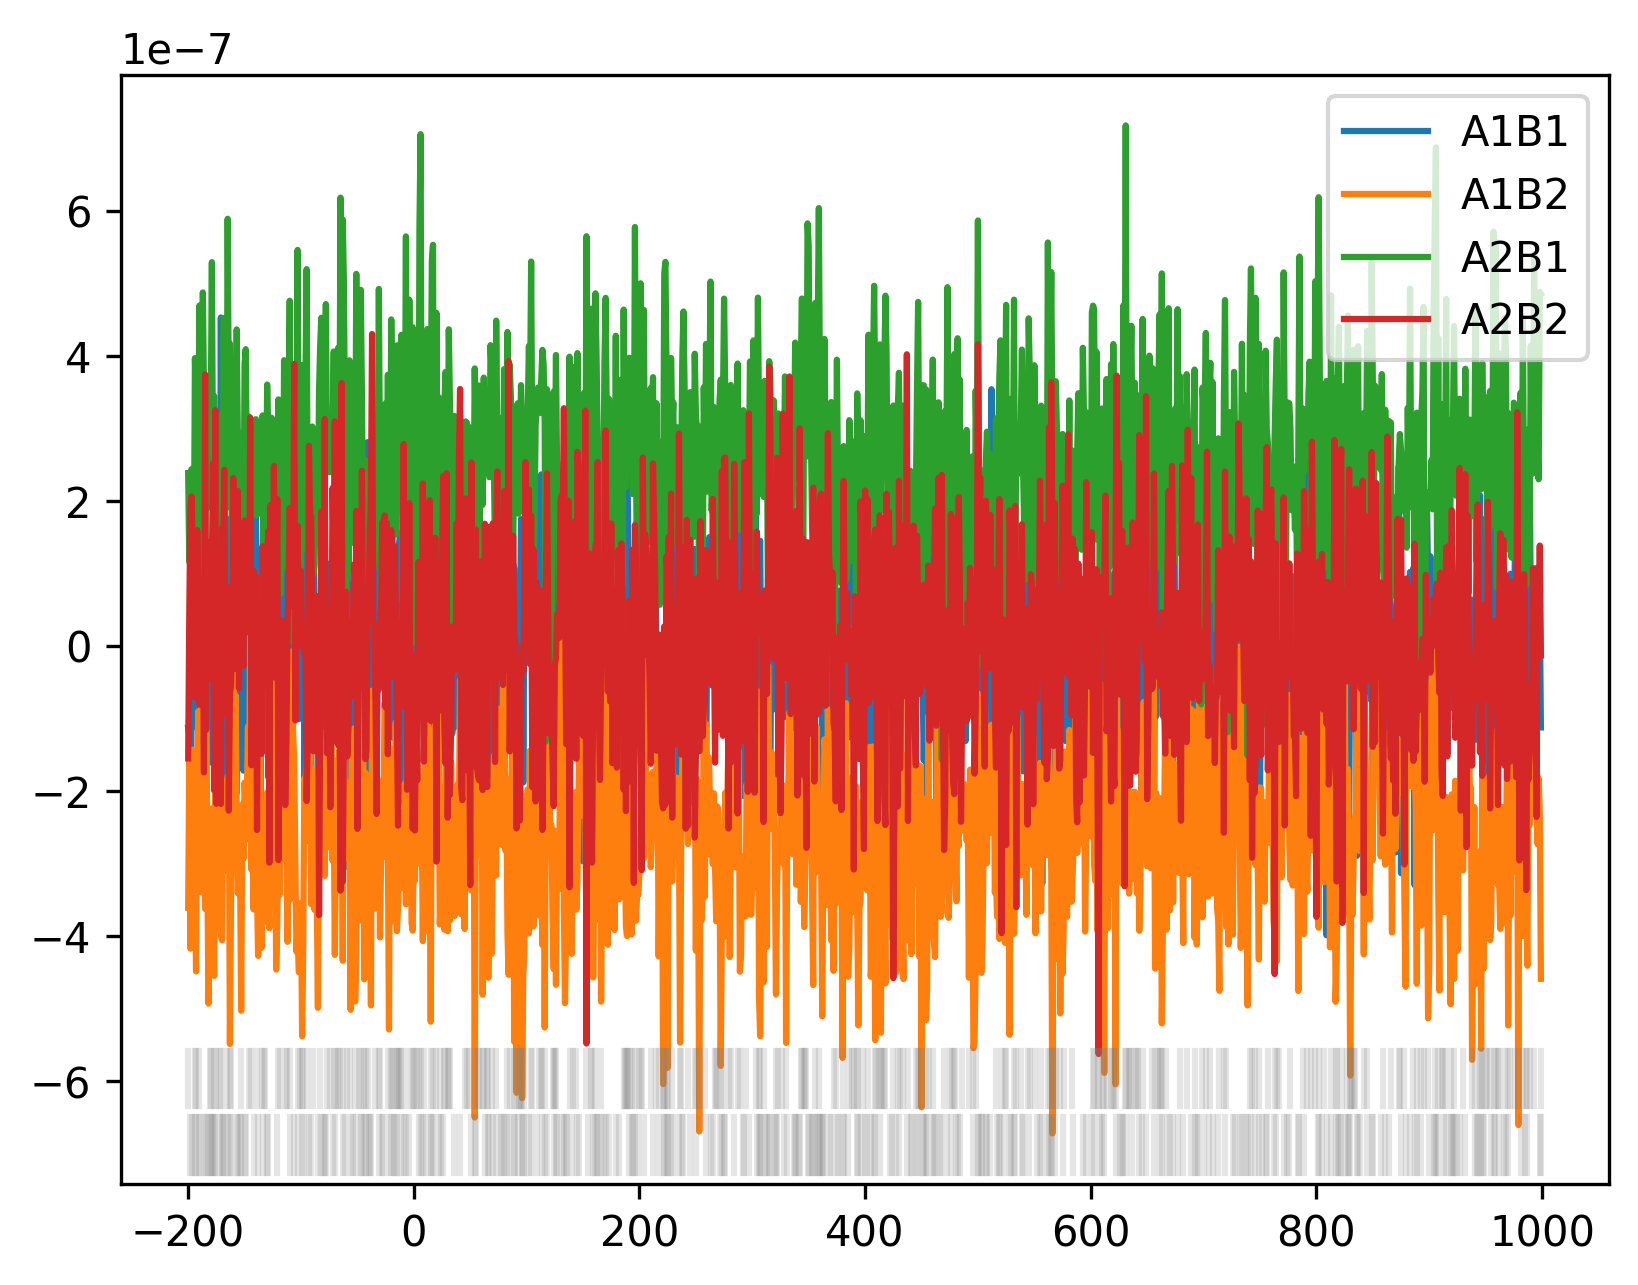

In [39]:
# 生成虚假（随机）数据
data_A1B1 = np.random.uniform(low=-3e-6, high=3e-6, size=(200, 1200))
data_A1B2 = np.random.uniform(low=-3.5e-6, high=3e-6, size=(200, 1200))
data_A2B1 = np.random.uniform(low=-3e-6, high=3.5e-6, size=(200, 1200))
data_A2B2 = np.random.uniform(low=-3.5e-6, high=3.5e-6, size=(200, 1200))
# 首先对数据进行reshape方便后续合并
reshaped_A1B1 = data_A1B1.reshape(200, 1, 1200)
reshaped_A1B2 = data_A1B2.reshape(200, 1, 1200)
reshaped_A2B1 = data_A2B1.reshape(200, 1, 1200)
reshaped_A2B2 = data_A2B2.reshape(200, 1, 1200)
#把数据按照两个因素的顺序（A1B1、A1B2、A2B1、A2B2）合并
data_combine = np.concatenate((reshaped_A1B1, reshaped_A1B2, 
                               reshaped_A2B1, reshaped_A2B2), axis=1)
# 设置变量水平
factor_levels = [2, 2]
# 使用MNE的f_mway_rm函数进行2×2方差分析
# 变量A的主效应
f_main_A, p_main_A = f_mway_rm(data_combine, factor_levels, effects='A')
# 变量B的主效应
f_main_B, p_main_B = f_mway_rm(data_combine, factor_levels, effects='B')
# 交互效应
f_inter, p_interaction = f_mway_rm(data_combine, factor_levels, effects='A:B')
# FDR矫正
rejects_A, p_main_A = fdr_correction(p_main_A, alpha=0.05)
rejects_B, p_main_B = fdr_correction(p_main_B, alpha=0.05)
rejects_inter, p_interaction = fdr_correction(p_interaction, alpha=0.05)
# 可视化经过矫正的统计检验结果
# 图片下方三行灰色竖线，有下至上分别代表A主效应、B主效应和交互效应显著的时间点
plt.plot(times, np.average(data_A1B1, axis=0), label='A1B1')
plt.plot(times, np.average(data_A1B2, axis=0), label='A1B2')
plt.plot(times, np.average(data_A2B1, axis=0), label='A2B1')
plt.plot(times, np.average(data_A2B2, axis=0), label='A2B2')
for i in range(1200):
    if p_main_A[i] < 0.05:
        plt.axvline(x=times[i], ymin=0.01, ymax=0.06, color='grey', alpha=0.2)
    if p_main_B[i] < 0.05:
        plt.axvline(x=times[i], ymin=0.07, ymax=0.12, color='grey', alpha=0.2)
    if p_interaction[i] < 0.05:
        plt.axvline(x=times[i], ymin=0.13, ymax=0.18, color='grey', alpha=0.2)
plt.legend()
plt.show()